# **Data Collection**

Sebelum Dimulai Kita Perlu Import Dan Load Data Yang Diperlukan

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
# set max_columns to None
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', 120)

data = pd.read_csv('../data/data_daegu_apartment.csv')

# **Exploratory Data Analysis (EDA)**

Setelah Dilakukan Koleksi Data, Kita Akan Mengeksplorasi Data Ini Dengan Melakukan EDA.

### Distribution of Data

Mengecek Apakah Distribusi Data Pada Dataset Ini Merata Atau Tidak

##### `Numerical Features`

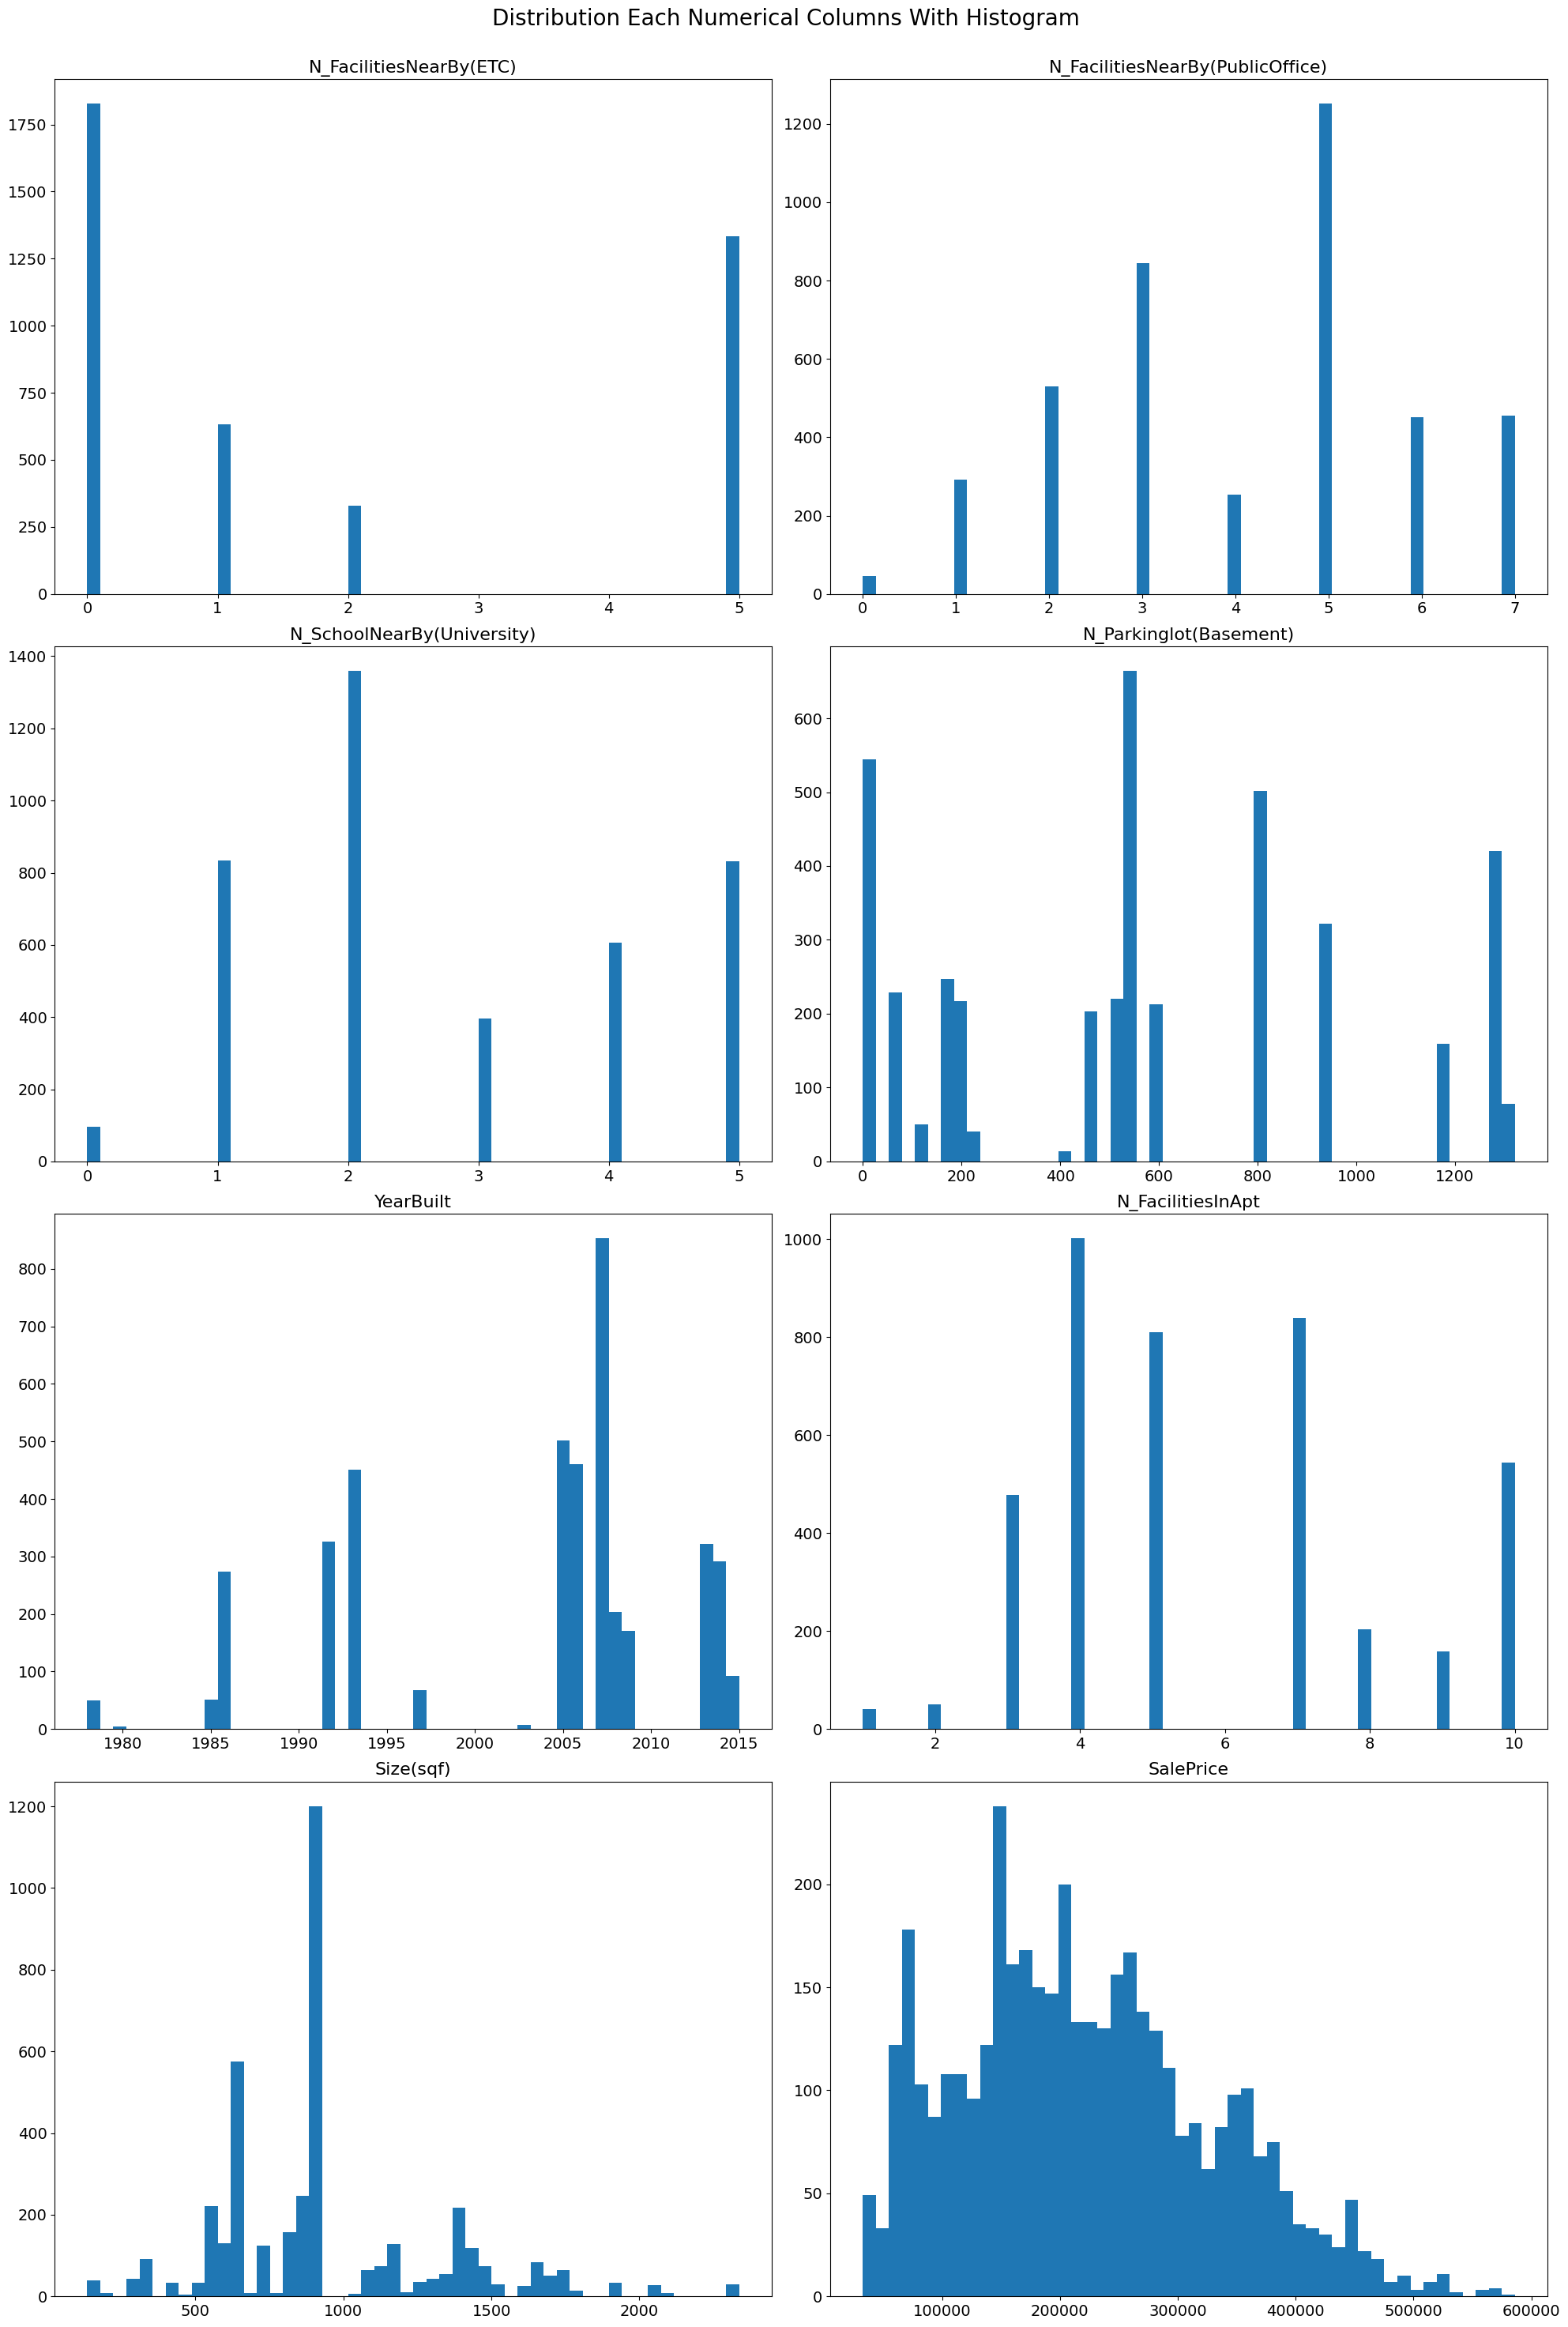

In [38]:
# Show Distribution Each Columns With Histogram
num_cols = len(data.select_dtypes(include=[np.number]).columns)
fig, axes = plt.subplots(num_cols // 2, 2, figsize=(20, 30))

for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    # Histogram
    row = i // 2
    col = i % 2
    axes[row, col].hist(data[column], bins=50)
    axes[row, col].set_title(column, fontsize=16)  # Increase font size here

    # Increase font size for x and y ticks
    axes[row, col].tick_params(axis='both', which='major', labelsize=14)

plt.suptitle('Distribution Each Numerical Columns With Histogram', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.95)  # Adjust the top space to accommodate the bigger title
plt.show()

Ini Adalah Hasil Untuk Distribusi Data Fitur Numerik.

Dilihat dari distribusi datanya dan boxplot-nya, dapat dilihat bahwa:
1. Fitur dengan Distribusi data yang condong ke kiri:<br>
N_Parkinglot(basement), Size(sqf), SalePrice, N_FacilitiesInApt<br>    
2. Fitur dengan Distribusi data yang condong ke kanan:<br>
YearBuilt, N_SchoolNearBy(University), N_FacilitiesNearBy(PublicOffice)<br> 
3. Fitur dengan Distribusi data yang menengah:<br> 
N_FacilitiesNearBy(ETC)<br>

Secara Keseluruhan Data Yang Disajikan tidak normal.

##### `Categorical Features`

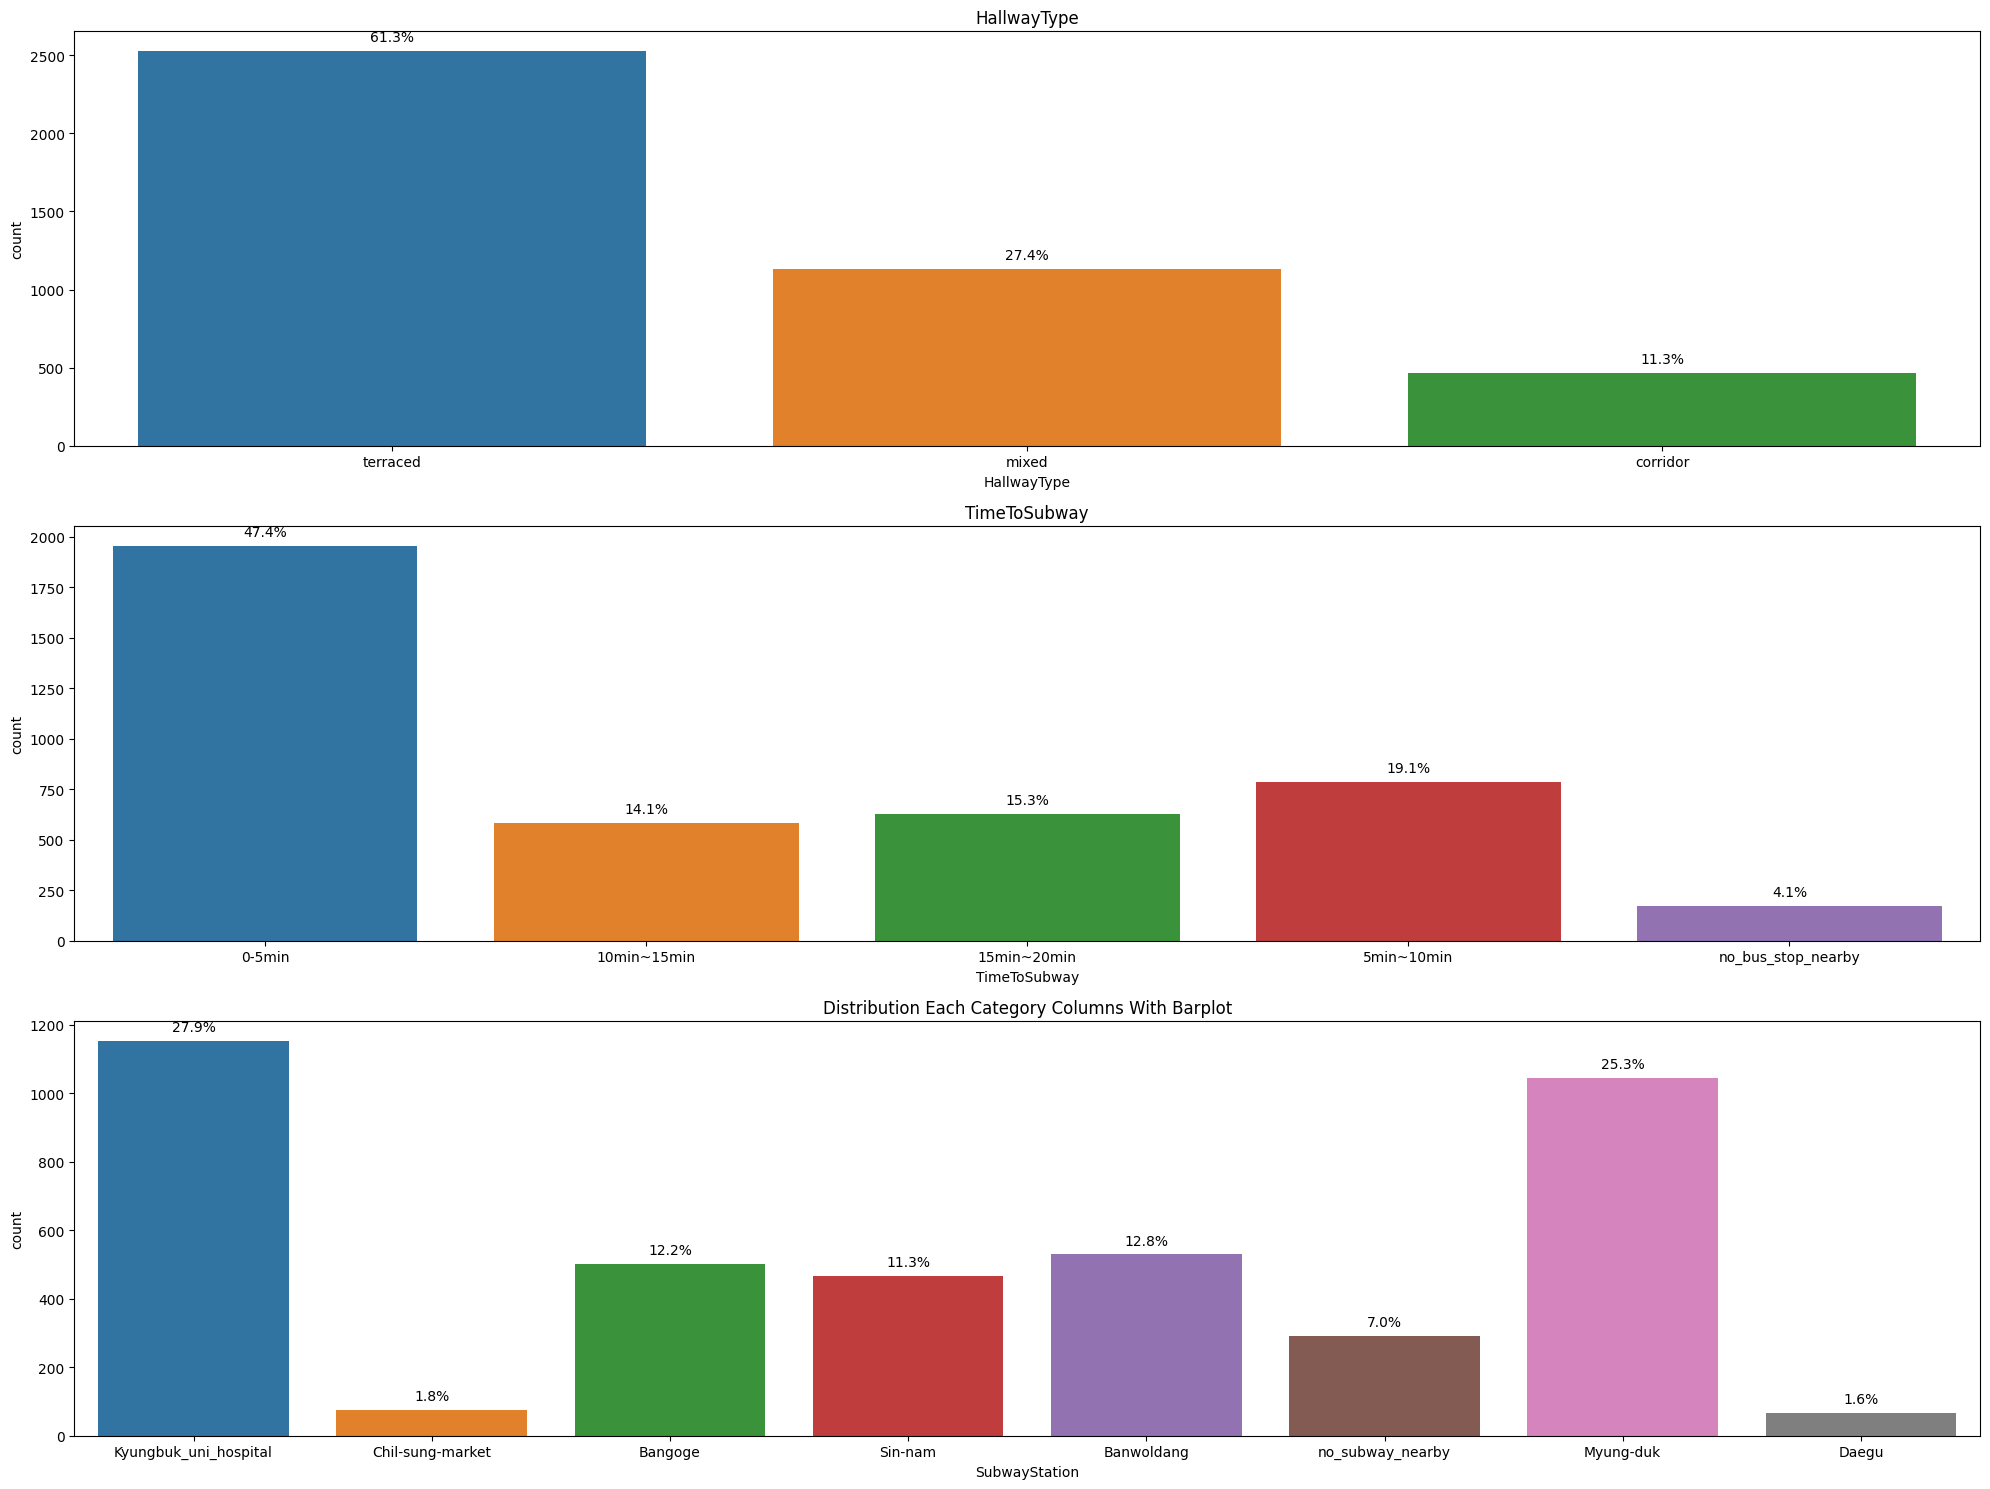

In [39]:
# Show Distribution Category Columns With Barplot
fig, axes = plt.subplots(len(data.select_dtypes(include=['object']).columns), 1, figsize=(20, 15))

for i, column in enumerate(data.select_dtypes(include=['object']).columns):
    # Barplot
    ax = sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

    # Calculate the total data points for percentage calculation
    total = len(data[column])
    for p in ax.patches:
        # Calculate percentage
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        # Display the percentage on top of each bar
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 10), 
                     textcoords = 'offset points')

plt.title('Distribution Each Category Columns With Barplot')
plt.tight_layout()
plt.show()

Ini Adalah hasil Distribusi Data Pada Fitur Kategorikal.

Insights:<br>
- Bisa Dilihat Pada Kolom HallwayType Terdiri Dari 3 unique value:<br>
'Terrace' 61.3% <br>'Mixed' 27.4%<br> 'Corridor' 11.3%.<br>
- Bisa Dilihat Pada Kolom TimeToSubway Terdiri Dari 5 unique value:<br>
'0-5 min' 47.4%,<br> '5-10 min' 14.1%<br> '10-15 min' 15.3%<br> '15min-20min' 19.1%<br> 'no_bus_stop_nearby' 4.1%<br>
- Bisa Dilihat Pada Kolom SubwayStation Terdiri Dari 8 unique value:<br>
'Kyungbuk_uni_hospital' 27.9%<br> 'Ching-sung-market' 1.8%<br> 'Bangoge' 12.2%<br> 'Sin-nam' 11.3%<br> 'Banwoldang' 12.8%<br> 'Myung-duk' 25.3%<br> 'Daegu' 1.6%<br> 'no_subway_nearby' 7.0%<br><br>

### Correlation

Mengecek Korelasi Antar Fitur Yang Ada Pada Dataset Ini Dengan Menggunakan Heatmap. Ini Detail Data Yang Sudah Diubah Menjadi Numerik
| Feature | Description |
| ------- | ----------- |
| HallwayType | 'terraced': 3, 'corridor': 1, 'mixed': 2|
| TimeToSubway | '0-5min': 1,'5min~10min': 2,'10min~15min': 3,'15min~20min': 4, 'no_bus_stop_nearby': 0|
| SubwayStation | 'Kyungbuk_uni_hospital': 1, 'Chil-sung-market':2 , 'Bangoge': 3, 'Sin-nam': 4, 'Banwoldang': 5, 'no_subway_nearby': 0, 'Myung-duk': 6, 'Daegu': 7|
| N_FacilitiesNearBy(ETC) | '1': 2, '0': 1, '2': 3, '5': 4 |
| N_FacilitiesNearBy(PublicOffice) | '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8|
| N_SchoolNearBy(University) | '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6|
| N_Parkinglot(Basement) | '0-200':1, '200-400':2, '400-600':3, '600-800':4, '800-1000':5, '1000-1200':6, '1200-1400':7 |
| YearBuilt | '1970-1980':1, '1980-1990':2, '1990-2000':3, '2000-2010':4, '2010-2020':5|
| N_FacilitiesInApt | '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '7':6, '8':7, '9':8, '10':9 |
| Size(sqf) | '0-500':1, '500-1000':2, '1000-1500':3, '1500-2000':4, '2000-2500':5|
| SalePrice | '0-100000':1, '100000-200000':2, '200000-300000':3, '300000-400000':4, '400000-500000':5, '500000-600000':6 |

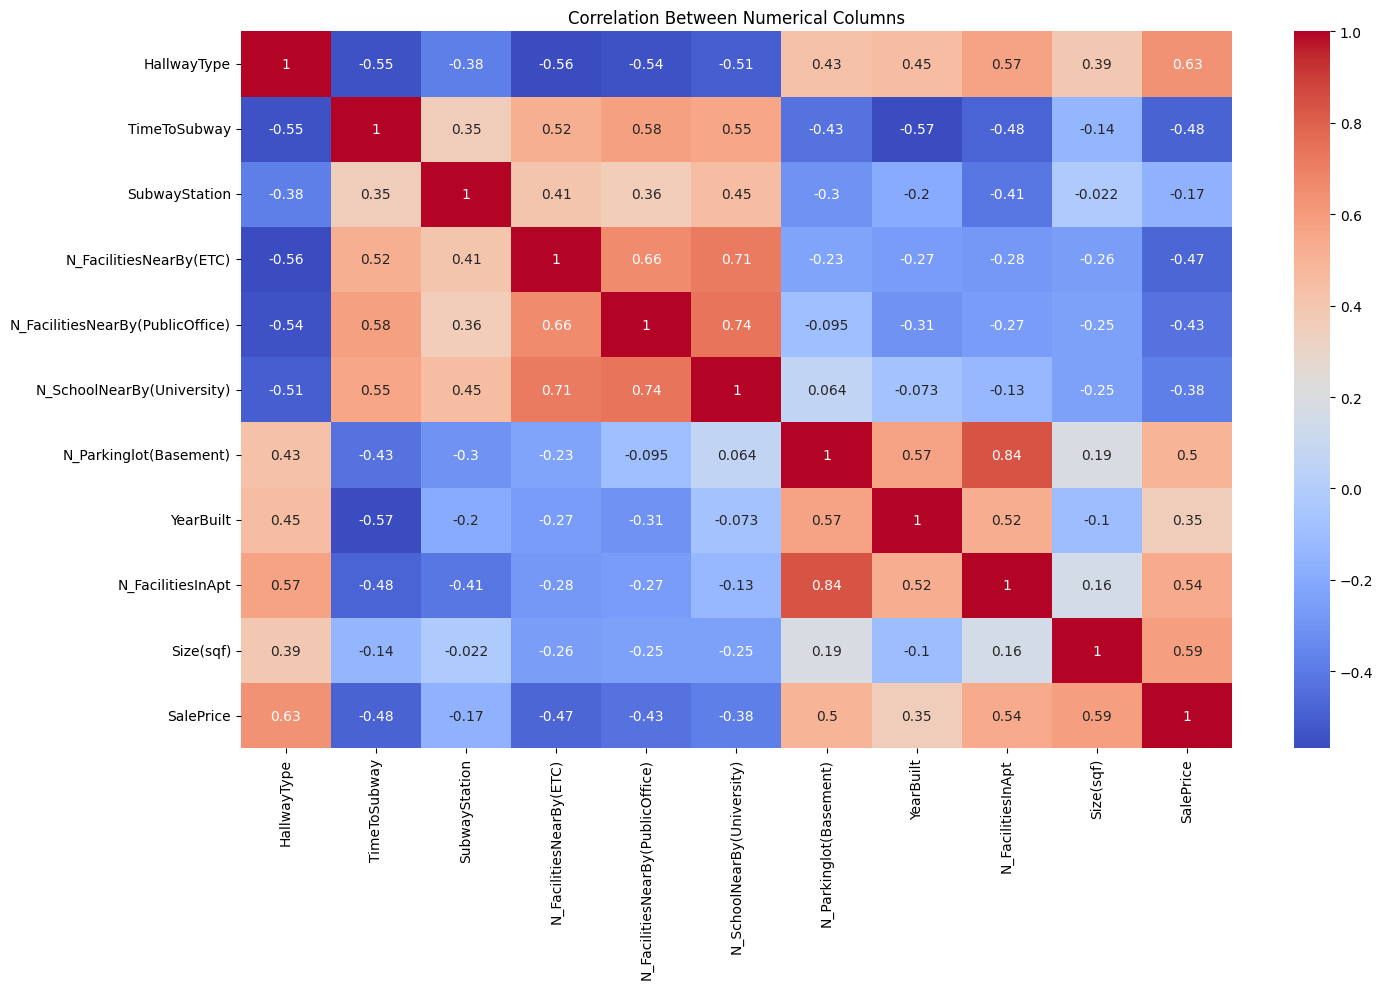

In [40]:
# Show Correlation Between Columns
data_corr = pd.read_csv('../data/data_daegu_apartment_preprocessed.csv')
plt.figure(figsize=(15, 10))
plt.title('Correlation Between Numerical Columns')
sns.heatmap(data_corr.corr(), annot=True, cmap='coolwarm')
plt.tight_layout()
plt.show()

*Korelasi antara fitur dan harga apartemen*:<br>
- HallwayType Dengan SalePrice: 0.63 (Positif)
- N_Parkinglot(basement) Dengan SalePrice: 0.5 (Positif)
- Size(sqf) Dengan SalePrice: 0.59 (Positif)
- N_FacilitiesInApt Dengan SalePrice: 0.54 (Positif)
- YearBuilt Dengan SalePrice: 0.35 (Positif)
- N_FacilitiesNearBy(PublicOffice) Dengan SalePrice: -0.43 (Negatif)
- N_SchoolNearBy(University) Dengan SalePrice: -0.38 (Negatif)
- N_FacilitiesNearBy(ETC) Dengan SalePrice: -0.47 (Negatif)
- TimeToSubway Dengan SalePrice: -0.48 (Negatif)
- SubwayStation Dengan SalePrice: -0.17 (Negatif)

Positif: Semakin tinggi nilai fitur, semakin tinggi harga apartemen.<br>
Negatif: Semakin tinggi nilai fitur, semakin rendah harga apartemen.<br>

### Bivariate Analysis

Bivariate Analysis Digunakan Untuk Mencari Hubungan Antar Fitur yang lebih spesifik.

##### Significance Test

Significance Test Digunakan Untuk Mencari Kevalidan Fitur Terhadap Target. Saya Akan Menggunakan Data Yang Sudah DiOrdinalkan.
Kurang Lebihnya Ordinal Datanya Seperti Ini:<br>
| Feature | Description |
| ------- | ----------- |
| HallwayType | 'terraced': 3, 'corridor': 1, 'mixed': 2|
| TimeToSubway | '0-5min': 1,'5min~10min': 2,'10min~15min': 3,'15min~20min': 4, 'no_bus_stop_nearby': 0|
| SubwayStation | 'Kyungbuk_uni_hospital': 1, 'Chil-sung-market':2 , 'Bangoge': 3, 'Sin-nam': 4, 'Banwoldang': 5, 'no_subway_nearby': 0, 'Myung-duk': 6, 'Daegu': 7|
| N_FacilitiesNearBy(ETC) | '1': 2, '0': 1, '2': 3, '5': 4 |
| N_FacilitiesNearBy(PublicOffice) | '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6, '6': 7, '7': 8|
| N_SchoolNearBy(University) | '0': 1, '1': 2, '2': 3, '3': 4, '4': 5, '5': 6|
| N_Parkinglot(Basement) | '0-200':1, '200-400':2, '400-600':3, '600-800':4, '800-1000':5, '1000-1200':6, '1200-1400':7 |
| YearBuilt | '1970-1980':1, '1980-1990':2, '1990-2000':3, '2000-2010':4, '2010-2020':5|
| N_FacilitiesInApt | '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '7':6, '8':7, '9':8, '10':9 |
| Size(sqf) | '0-500':1, '500-1000':2, '1000-1500':3, '1500-2000':4, '2000-2500':5|
| SalePrice | '0-100000':1, '100000-200000':2, '200000-300000':3, '300000-400000':4, '400000-500000':5, '500000-600000':6 |

Berdasarkan Notebook Sebelumnya Kita Sudah Mencakup Variabel Yang Diperlukan Dalam Menentukan Harga Apartemen Di Daegu. Variabel-Variabel Tersebut Adalah:<br>

##### `Structural Variable`

In [41]:
from scipy.stats import pearsonr

# Select multiple columns
cols = ['HallwayType', 'N_Parkinglot(Basement)', 'YearBuilt', 'N_FacilitiesInApt', 'Size(sqf)']
p_values = []

# Calculate Pearson correlation coefficient for each column, the p-value, and the mean
for col in cols:
    corr, p_value = pearsonr(data_corr[col], data['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Calculate and print the mean of all p-values
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')

p-value for HallwayType: 0.0
p-value for N_Parkinglot(Basement): 7.748200410456492e-274
p-value for YearBuilt: 2.847196035609453e-130
p-value for N_FacilitiesInApt: 0.0
p-value for Size(sqf): 0.0

Mean of all p-values: 0.0

This criteria is valid.


Kriteria Rata - Rata Dari Variabel Struktural Adalah Dibawah 0.05, Jadi Dari Variable Struktural Sudah Dianggap Signifikan(Valid).

##### `Proximity Variable`

In [42]:
# Select multiple columns
cols = ['TimeToSubway', 'SubwayStation']
p_values = []

# Calculate Pearson correlation coefficient for each column, the p-value, and the mean
for col in cols:
    corr, p_value = pearsonr(data_corr[col], data['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Calculate and print the mean of all p-values
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')

p-value for TimeToSubway: 1.280895040372856e-250
p-value for SubwayStation: 4.76055358969154e-28

Mean of all p-values: 0.0

This criteria is valid.


##### `Neighborhood Variable`

In [43]:
# Select multiple columns
cols = ['N_SchoolNearBy(University)', 'N_FacilitiesNearBy(PublicOffice)', 'N_FacilitiesNearBy(ETC)']
p_values = []

# Calculate Pearson correlation coefficient for each column, the p-value, and the mean
for col in cols:
    corr, p_value = pearsonr(data_corr[col], data['SalePrice'])
    p_values.append(p_value)
    print(f'p-value for {col}:', p_value)

# Calculate and print the mean of all p-values
mean_p_value = np.mean(p_values).round(4)
print(f'\nMean of all p-values: {mean_p_value}')

if mean_p_value < 0.05:
    print('\nThis criteria is valid.')
else:
    print('\nThis criteria is not valid.')

p-value for N_SchoolNearBy(University): 1.2425417830443112e-152
p-value for N_FacilitiesNearBy(PublicOffice): 2.9822068234554104e-209
p-value for N_FacilitiesNearBy(ETC): 1.3880964688284702e-232

Mean of all p-values: 0.0

This criteria is valid.


Insight:<br>
- Semua nilai p-value untuk setiap kriteria dan fitur berada di bawah 0,05.<br> kita dapat mengatakan bahwa setiap fitur memiliki relevansi yang kuat dengan target "SalePrice".

##### Visualize Test
Dengan Boxplot, kita dapat melihat relasi distribusi antara setiap kriteria dan fitur dengan target "SalePrice".<br>

##### `Size(sqf)` & `HallwayType`

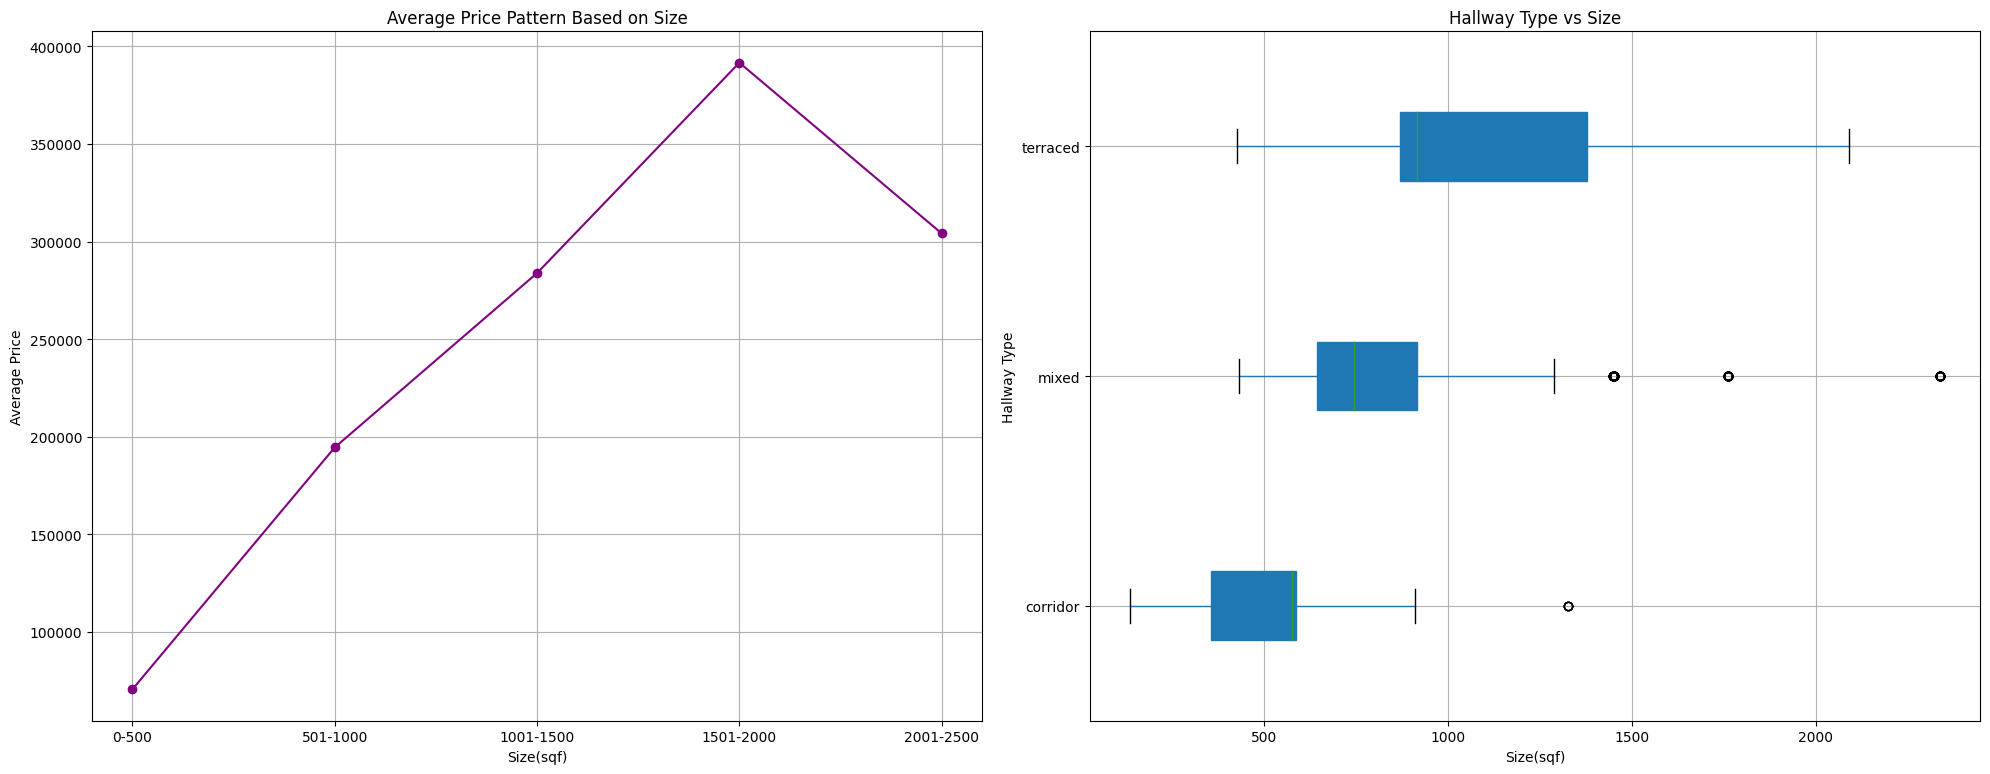

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the bins for 'Size(sqf)'
bins = [0, 500, 1000, 1500, 2000, 2500]

# Define your labels
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500']

# Use pandas' cut function to categorize 'Size(sqf)' into these bins
data['Size(sqf)_bins'] = pd.cut(data['Size(sqf)'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Sort DataFrame by 'Size(sqf)_bins'
df = data.sort_values('Size(sqf)_bins')

# Group by 'Size(sqf)_bins' and calculate the mean of 'SalePrice'
df_avg = df.groupby('Size(sqf)_bins')['SalePrice'].mean().reset_index()

# Plot the average price pattern based on size on the first subplot
axs[0].plot(df_avg['Size(sqf)_bins'], df_avg['SalePrice'], marker='o', linestyle='-', color='purple')
axs[0].set_title('Average Price Pattern Based on Size')
axs[0].set_xlabel('Size(sqf)')
axs[0].set_ylabel('Average Price')
axs[0].grid(True)

# Define a color dictionary
colors = {'mixed': 'blue', 'terraced': 'orange', 'corridor': 'green'}

# Create the boxplot on the second subplot
boxplot = df.boxplot(column='Size(sqf)', by='HallwayType', patch_artist=True, vert=False, ax=axs[1])

# Remove the title "Boxplot Grouped By HallwayType"
plt.suptitle('')

# Change the color of each box
for i in range(len(boxplot.artists)):
    boxplot.artists[i].set_facecolor(colors[df['HallwayType'].unique()[i]])

axs[1].set_title('Hallway Type vs Size')
axs[1].set_xlabel('Size(sqf)')
axs[1].set_ylabel('Hallway Type')

# Show the plots
plt.tight_layout()
plt.show()

- Grafik garis memiliki garis ungu dengan 6 titik data. Sumbu x menunjukkan ukuran properti dalam satuan kaki persegi (sqft) dan sumbu y menunjukkan harga properti dalam satuan won(korea). Garis ungu menunjukkan bahwa harga rata-rata properti meningkat seiring dengan ukuran properti. Titik data terendah berada di kiri bawah grafik, dengan ukuran sekitar 200 sqft dan harga sekitar 100.000 won(korea). Titik data tertinggi berada di kanan atas grafik, dengan ukuran sekitar 600 sqft dan harga sekitar 400.000 won(korea).
- Grafik kotak memiliki 3 kotak biru yang mewakili tipe lorong yang berbeda: corridor, mixed, dan terraced. Sumbu x menunjukkan tipe lorong dan sumbu y menunjukkan ukuran properti dalam satuan kaki persegi (sqft). Kotak biru menunjukkan rentang ukuran properti untuk setiap tipe lorong, dengan garis horizontal di tengah kotak menunjukkan median ukuran properti. Kotak biru paling kiri menunjukkan bahwa properti dengan tipe lorong corridor memiliki ukuran properti yang paling kecil, dengan median sekitar 250 sqft. Kotak biru paling kanan menunjukkan bahwa properti dengan tipe lorong terraced memiliki ukuran properti yang paling besar, dengan median sekitar 450 sqft. Kotak biru di tengah menunjukkan bahwa properti dengan tipe lorong mixed memiliki ukuran properti yang beragam, dengan median sekitar 350 sqft.

##### `YearBuilt` & `HallwayType`

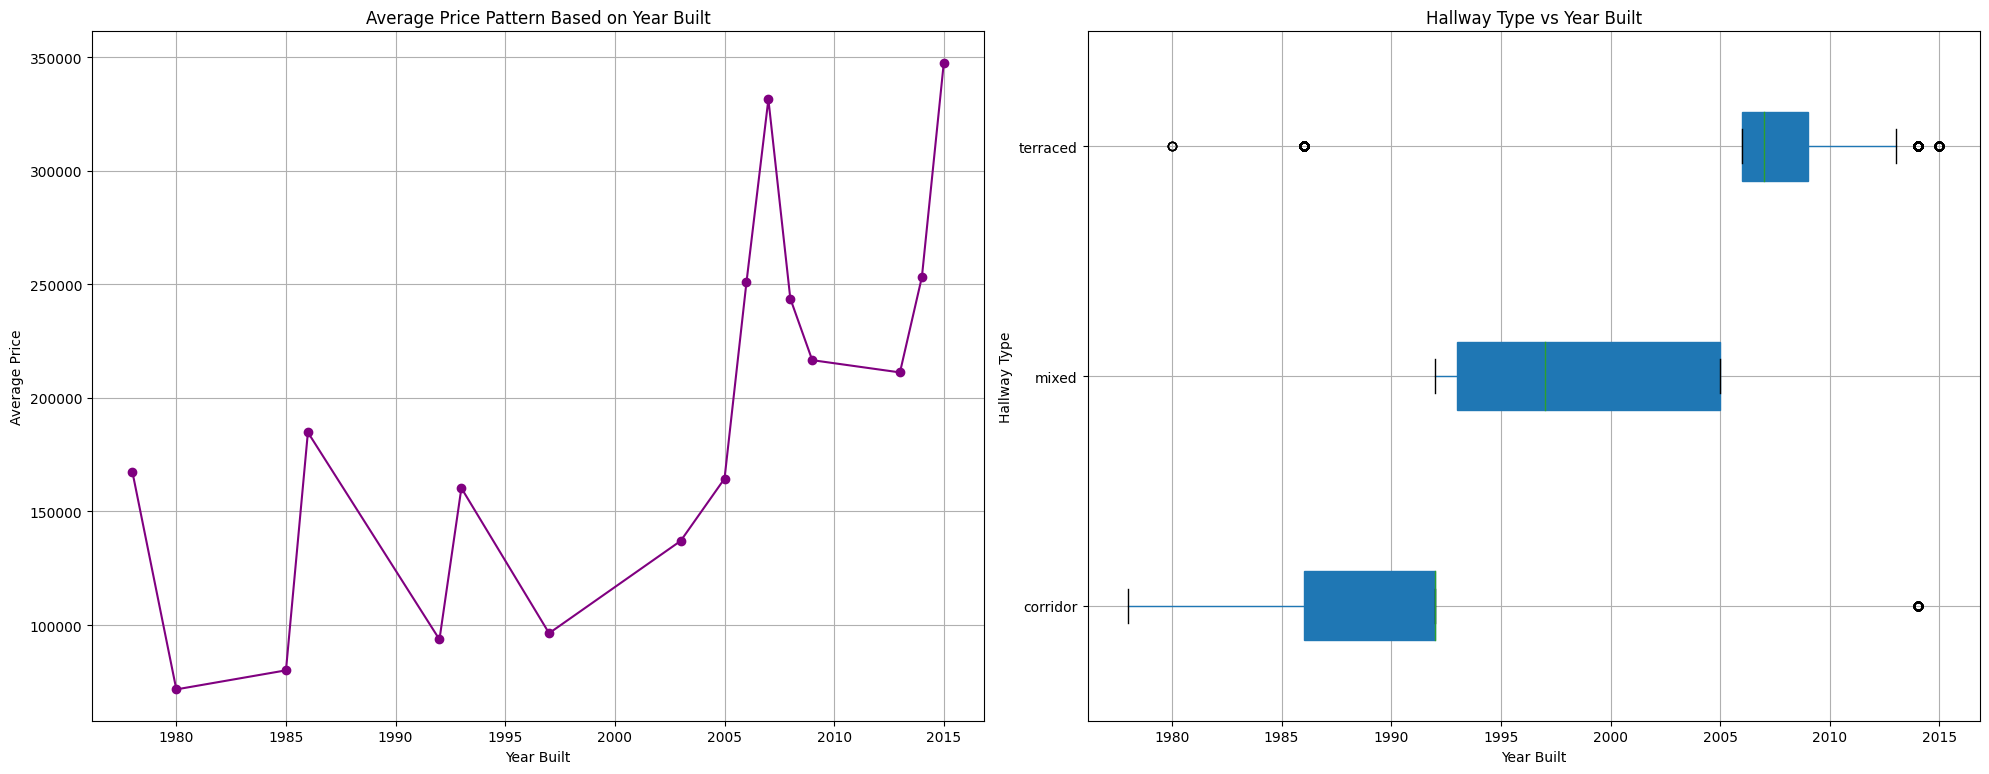

In [45]:
import matplotlib.pyplot as plt

# Create a figure with two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Sort DataFrame by 'Year Built'
df = data.sort_values('YearBuilt')

# Group by 'YearBuilt' and calculate the mean of 'SalePrice'
df_avg = df.groupby('YearBuilt')['SalePrice'].mean().reset_index()

# Plot the average price pattern based on year built on the first subplot
axs[0].plot(df_avg['YearBuilt'], df_avg['SalePrice'], marker='o', linestyle='-', color='purple')
axs[0].set_title('Average Price Pattern Based on Year Built')
axs[0].set_xlabel('Year Built')
axs[0].set_ylabel('Average Price')
axs[0].grid(True)

# Define a color dictionary
colors = {'mixed': 'blue', 'terraced': 'orange', 'corridor': 'green'}

# Create the boxplot on the second subplot
boxplot = df.boxplot(column='YearBuilt', by='HallwayType', patch_artist=True, vert=False, ax=axs[1])

# Remove the title "Boxplot Grouped By HallwayType"
plt.suptitle('')

# Change the color of each box
for i in range(len(boxplot.artists)):
    boxplot.artists[i].set_facecolor(colors[df['HallwayType'].unique()[i]])

axs[1].set_title('Hallway Type vs Year Built')
axs[1].set_xlabel('Year Built')
axs[1].set_ylabel('Hallway Type')

# Show the plots
plt.tight_layout()
plt.show()

Gambar ini menunjukkan dua grafik yang berhubungan dengan harga dan tahun pembangunan rumah. Grafik kiri adalah grafik garis yang menunjukkan tren harga rata-rata berdasarkan tahun pembangunan rumah. Grafik kanan adalah grafik kotak yang menunjukkan perbandingan harga rumah untuk berbagai tipe rumah berdasarkan tahun pembangunan rumah. Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik garis memiliki garis ungu dengan beberapa titik data. Sumbu x menunjukkan tahun pembangunan rumah dan sumbu y menunjukkan harga rata-rata rumah dalam satuan won(korea). Garis ungu menunjukkan bahwa harga rata-rata rumah berfluktuasi seiring dengan tahun pembangunan rumah. Titik data tertinggi berada di sekitar tahun 2000, dengan harga rata-rata sekitar 300.000 won(korea). Titik data terendah berada di sekitar tahun 2010, dengan harga rata-rata sekitar 150.000 won(korea).
- Grafik kotak memiliki 3 kotak biru yang mewakili tipe rumah yang berbeda: corridor, mixed, dan terraced. Sumbu x menunjukkan tahun pembangunan rumah dan sumbu y menunjukkan harga rata-rata rumah dalam satuan won(korea). Kotak biru menunjukkan rentang harga rumah untuk setiap tipe rumah, dengan garis horizontal di tengah kotak menunjukkan median harga rumah. Kotak biru paling kiri menunjukkan bahwa rumah dengan tipe corridor memiliki harga rata-rata yang paling rendah, dengan median sekitar 100.000 won(korea). Kotak biru paling kanan menunjukkan bahwa rumah dengan tipe terraced memiliki harga rata-rata yang paling tinggi, dengan median sekitar 250.000 won(korea). Kotak biru di tengah menunjukkan bahwa rumah dengan tipe semi-corridor memiliki harga rata-rata yang sedang, dengan median sekitar 200.000 won(korea).

##### `N_FacilitiesInApt` & `HallwayType`

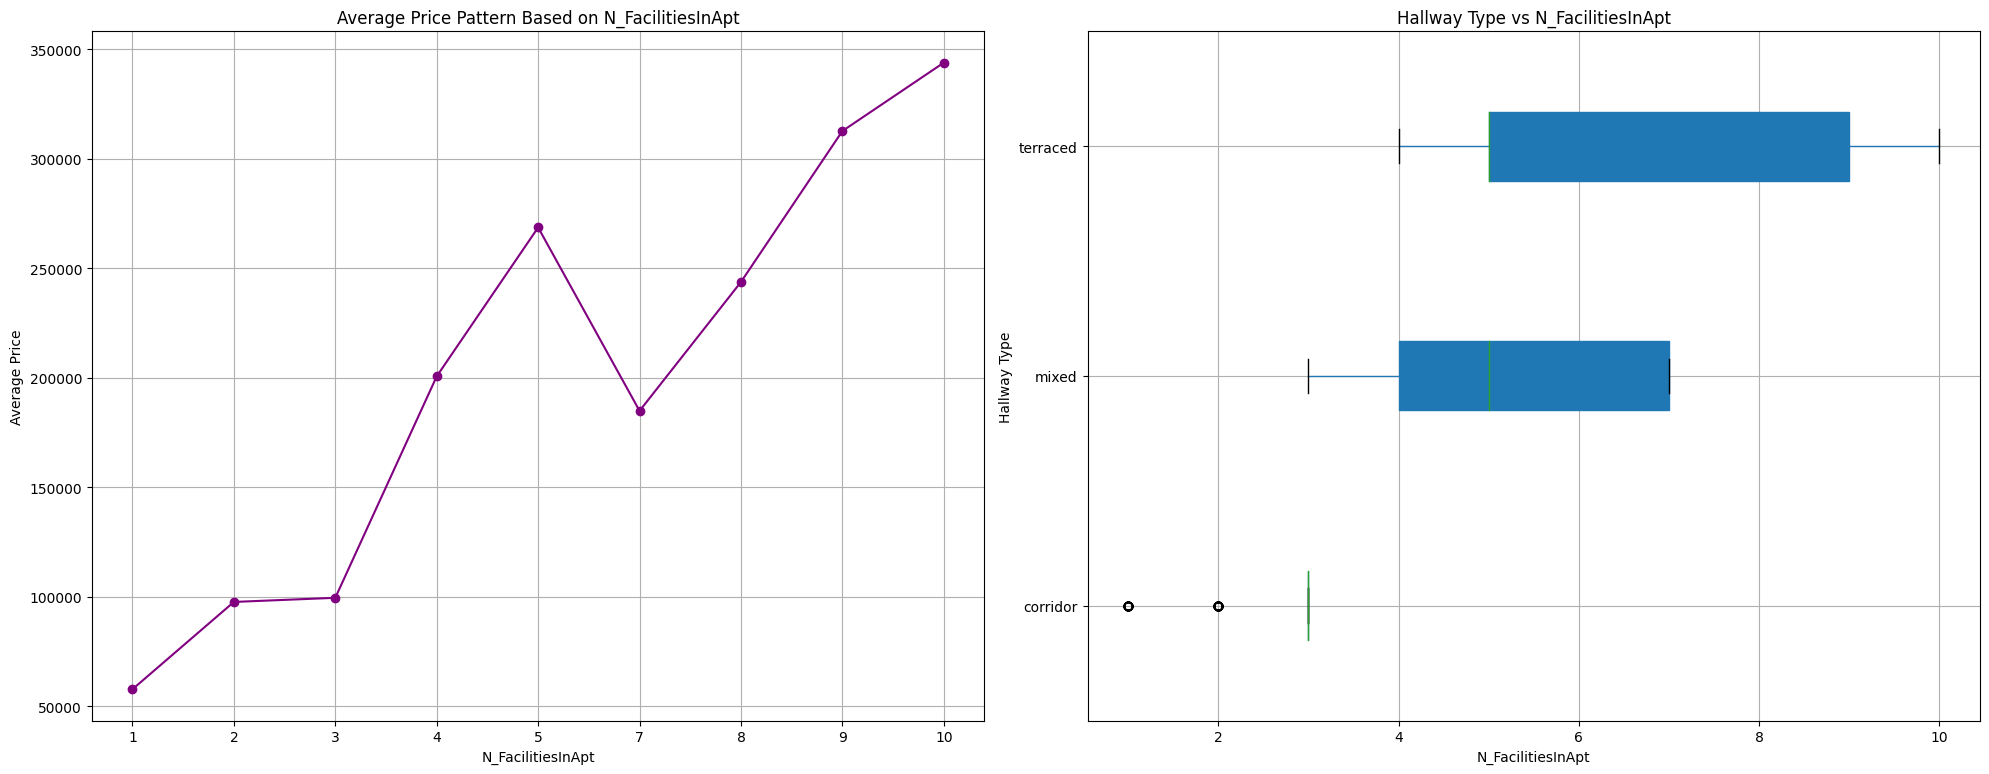

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Set the title for the entire figure
fig.suptitle('New Title for Entire Figure', fontsize=16)

# Define the bins for 'N_FacilitiesInApt'
bins = [0, 1, 2, 3, 4, 5, 7, 8, 9, 10]

# Define your labels
labels = ["1", "2", "3", "4", "5", "7", "8", "9", "10"]

# Use pandas' cut function to categorize 'N_FacilitiesInApt' into these bins
data['N_FacilitiesInApt_bins'] = pd.cut(data['N_FacilitiesInApt'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Sort DataFrame by 'N_FacilitiesInApt_bins'
df = data.sort_values('N_FacilitiesInApt_bins')

# Group by 'N_FacilitiesInApt_bins' and calculate the mean of 'SalePrice'
df_avg = df.groupby('N_FacilitiesInApt_bins')['SalePrice'].mean().reset_index()

# Plot the average price pattern based on N_FacilitiesInApt on the first subplot
axs[0].plot(df_avg['N_FacilitiesInApt_bins'], df_avg['SalePrice'], marker='o', linestyle='-', color='purple')
axs[0].set_title('Average Price Pattern Based on N_FacilitiesInApt')
axs[0].set_xlabel('N_FacilitiesInApt')
axs[0].set_ylabel('Average Price')
axs[0].grid(True)

# Define a color dictionary
colors = {'mixed': 'blue', 'terraced': 'orange', 'corridor': 'green'}

# Create the boxplot on the second subplot
boxplot = df.boxplot(column='N_FacilitiesInApt', by='HallwayType', patch_artist=True, vert=False, ax=axs[1])

# Remove the title "Boxplot Grouped By HallwayType"
plt.suptitle('')

# Change the color of each box
for i in range(len(boxplot.artists)):
    boxplot.artists[i].set_facecolor(colors[df['HallwayType'].unique()[i]])

axs[1].set_title('Hallway Type vs N_FacilitiesInApt')
axs[1].set_xlabel('N_FacilitiesInApt')
axs[1].set_ylabel('Hallway Type')

# Show the plots
plt.tight_layout()
plt.show()

Gambar ini menunjukkan dua grafik yang berhubungan dengan harga dan jumlah fasilitas dalam apartemen. Grafik kiri adalah grafik garis yang menunjukkan pola harga rata-rata berdasarkan jumlah fasilitas dalam apartemen. Grafik kanan adalah grafik boxplot yang menunjukkan perbandingan harga untuk berbagai tipe apartemen berdasarkan jumlah fasilitas dalam apartemen. Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik garis memiliki garis ungu dengan beberapa titik data. Sumbu x menunjukkan jumlah fasilitas dalam apartemen dan sumbu y menunjukkan harga rata-rata dalam satuan won(korea). Garis ungu menunjukkan bahwa harga rata-rata meningkat secara tajam dari 0% hingga 2%, kemudian menurun dari 2% hingga 4%, kemudian meningkat secara tajam lagi dari 4% hingga 8%.
- Grafik boxplot memiliki 3 kotak biru yang mewakili tipe apartemen yang berbeda: corridor, mixed, dan terraced. Sumbu x menunjukkan jumlah fasilitas dalam apartemen dan sumbu y menunjukkan tipe apartemen. Kotak biru menunjukkan rentang harga untuk setiap tipe apartemen, dengan garis horizontal di tengah kotak menunjukkan median harga. Kotak biru paling kiri menunjukkan bahwa apartemen dengan tipe corridor memiliki harga rata-rata yang paling rendah, dengan median sekitar 200 won(korea). Kotak biru paling kanan menunjukkan bahwa apartemen dengan tipe terraced memiliki harga rata-rata yang paling tinggi, dengan median sekitar 400 won(korea). Kotak biru di tengah menunjukkan bahwa apartemen dengan tipe mixed memiliki harga rata-rata yang sedang, dengan median sekitar 300 won(korea).

##### `N_FacilitiesNearBy(PublicOffice)` & `HallwayType`

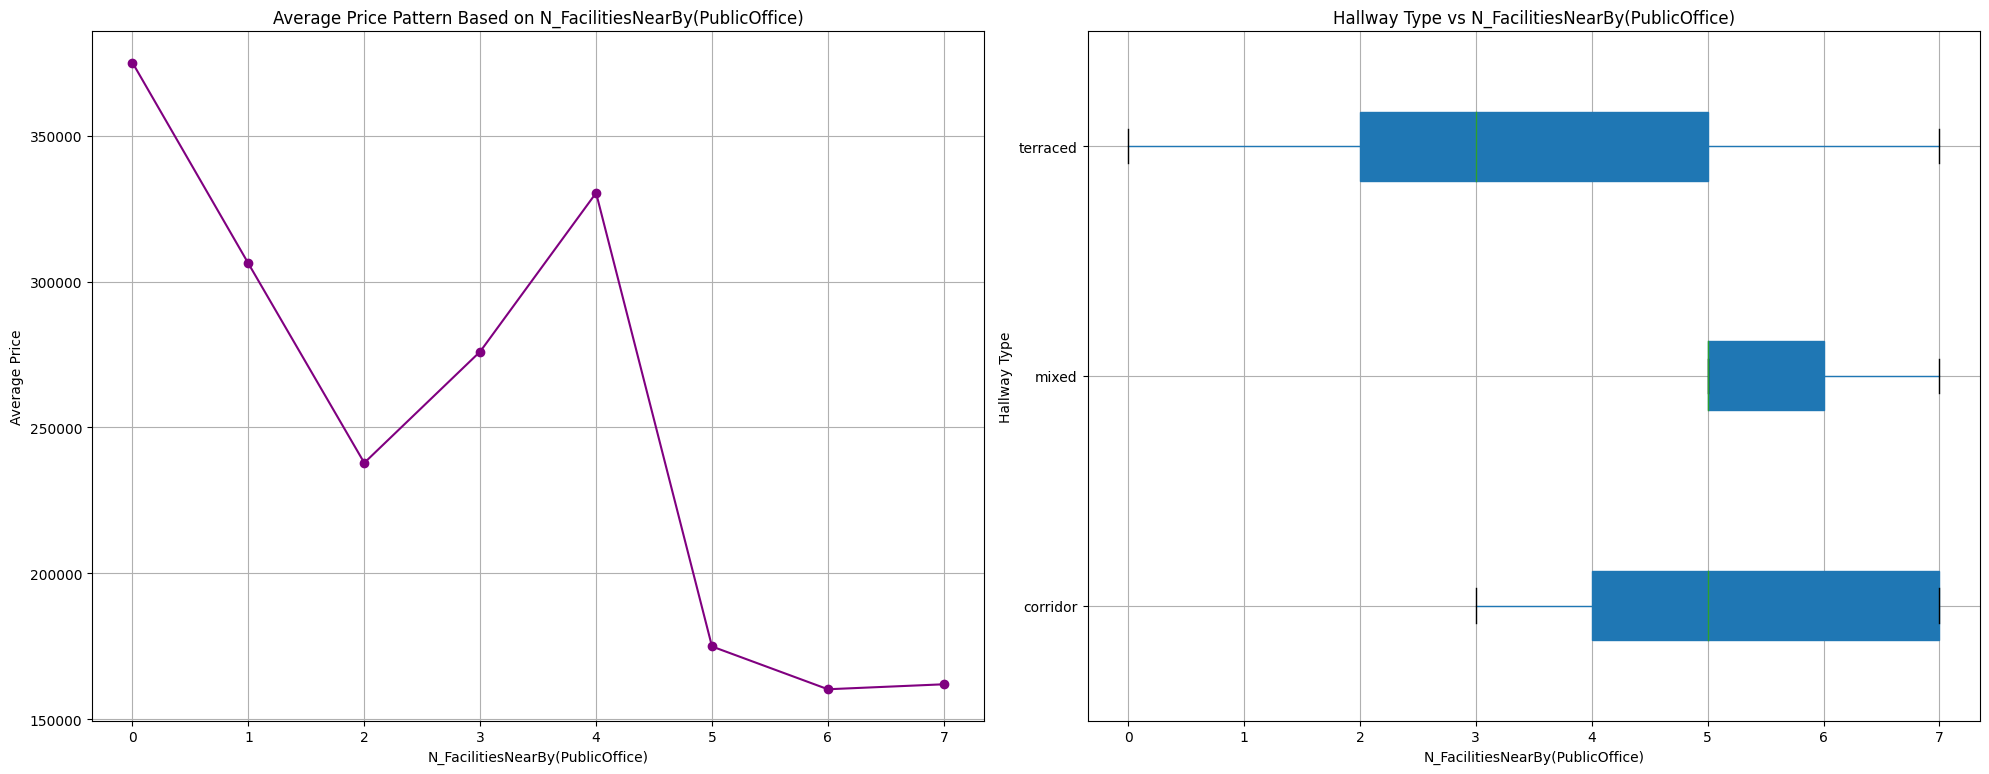

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the bins for 'N_FacilitiesNearBy(PublicOffice)'
bins = [-1, 0, 1, 2, 3, 4, 5, 6, 7]

# Define your labels
labels = ["0", "1", "2", "3", "4", "5", "6", "7"]

# Use pandas' cut function to categorize 'N_FacilitiesNearBy(PublicOffice)' into these bins
data['N_FacilitiesNearBy(PublicOffice)_bins'] = pd.cut(data['N_FacilitiesNearBy(PublicOffice)'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Sort DataFrame by 'N_FacilitiesNearBy(PublicOffice)_bins'
df = data.sort_values('N_FacilitiesNearBy(PublicOffice)_bins')

# Group by 'N_FacilitiesNearBy(PublicOffice)_bins' and calculate the mean of 'SalePrice'
df_avg = df.groupby('N_FacilitiesNearBy(PublicOffice)_bins')['SalePrice'].mean().reset_index()

# Plot the average price pattern based on N_FacilitiesNearBy(PublicOffice) on the first subplot
axs[0].plot(df_avg['N_FacilitiesNearBy(PublicOffice)_bins'], df_avg['SalePrice'], marker='o', linestyle='-', color='purple')
axs[0].set_title('Average Price Pattern Based on N_FacilitiesNearBy(PublicOffice)')
axs[0].set_xlabel('N_FacilitiesNearBy(PublicOffice)')
axs[0].set_ylabel('Average Price')
axs[0].grid(True)

# Define a color dictionary
colors = {'mixed': 'blue', 'terraced': 'orange', 'corridor': 'green'}

# Create the boxplot on the second subplot
boxplot = df.boxplot(column='N_FacilitiesNearBy(PublicOffice)', by='HallwayType', patch_artist=True, vert=False, ax=axs[1])

# Remove the title "Boxplot Grouped By HallwayType"
plt.suptitle('')

# Change the color of each box
for i in range(len(boxplot.artists)):
    boxplot.artists[i].set_facecolor(colors[df['HallwayType'].unique()[i]])

axs[1].set_title('Hallway Type vs N_FacilitiesNearBy(PublicOffice)')
axs[1].set_xlabel('N_FacilitiesNearBy(PublicOffice)')
axs[1].set_ylabel('Hallway Type')

# Show the plots
plt.tight_layout()
plt.show()

Gambar ini menunjukkan dua grafik yang berhubungan dengan jumlah fasilitas umum sekitar apartemen. Grafik kiri adalah grafik garis yang menunjukkan korelasi antara jumlah fasilitas umum sekitar apartemen dengan harga pasaran. Grafik kanan adalah grafik batang yang menunjukkan korelasi antara jumlah fasilitas umum sekitar apartemen dengan tipe lorong apartemen. Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik garis memiliki garis ungu dengan tiga titik data. Sumbu x menunjukkan jumlah fasilitas umum sekitar apartemen dan sumbu y menunjukkan harga pasaran dalam satuan rupiah. Garis ungu menunjukkan bahwa harga pasaran meningkat secara tajam dari 0% hingga 2%, kemudian menurun dari 2% hingga 4%, kemudian meningkat secara tajam lagi dari 4% hingga 8%. Ini berarti bahwa ada korelasi positif antara jumlah fasilitas umum sekitar apartemen dengan harga pasaran, tetapi korelasi tersebut tidak linear.
- Grafik batang memiliki tiga batang biru yang mewakili tiga tipe lorong apartemen: terraced, mixed, dan corridor. Sumbu x menunjukkan jumlah fasilitas umum sekitar apartemen dan sumbu y menunjukkan tipe lorong apartemen. Batang biru menunjukkan bahwa tipe lorong apartemen yang paling banyak memiliki fasilitas umum sekitar adalah corridor, dengan nilai sekitar 8%. Batang biru yang paling sedikit memiliki fasilitas umum sekitar adalah terraced, dengan nilai sekitar 0%. Batang biru di antara keduanya adalah mixed, dengan nilai sekitar 4%. Ini berarti bahwa ada korelasi negatif antara jumlah fasilitas umum sekitar apartemen dengan tipe lorong apartemen, yaitu semakin banyak fasilitas umum sekitar apartemen, semakin jarang tipe lorong apartemen yang terraced.

##### `N_SchoolNearBy(University)` & `HallwayType`

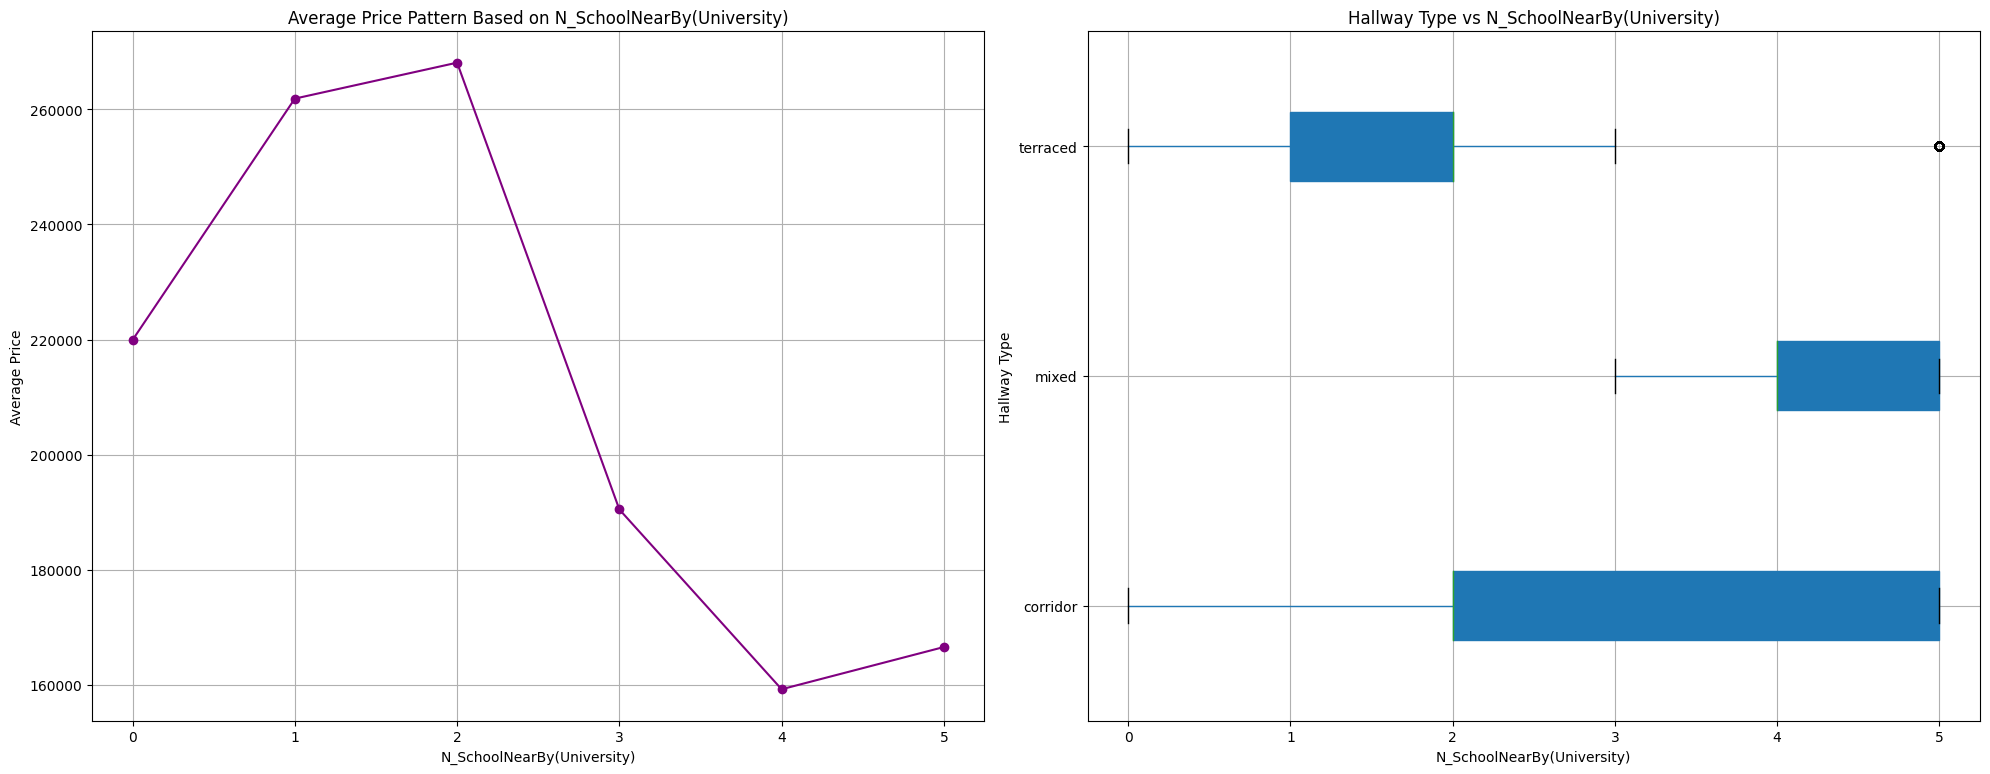

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the bins for 'N_SchoolNearBy(University)'
bins = [-1, 0, 1, 2, 3, 4, 5]

# Define your labels
labels = ["0", "1", "2", "3", "4", "5"]

# Use pandas' cut function to categorize 'N_SchoolNearBy(University)' into these bins
data['N_SchoolNearBy(University)_bins'] = pd.cut(data['N_SchoolNearBy(University)'], bins=bins, labels=labels, include_lowest=True)

# Create a figure with two subplots in one row and two columns
fig, axs = plt.subplots(1, 2, figsize=(20, 8))

# Sort DataFrame by 'N_SchoolNearBy(University)_bins'
df = data.sort_values('N_SchoolNearBy(University)_bins')

# Group by 'N_SchoolNearBy(University)_bins' and calculate the mean of 'SalePrice'
df_avg = df.groupby('N_SchoolNearBy(University)_bins')['SalePrice'].mean().reset_index()

# Plot the average price pattern based on N_SchoolNearBy(University) on the first subplot
axs[0].plot(df_avg['N_SchoolNearBy(University)_bins'], df_avg['SalePrice'], marker='o', linestyle='-', color='purple')
axs[0].set_title('Average Price Pattern Based on N_SchoolNearBy(University)')
axs[0].set_xlabel('N_SchoolNearBy(University)')
axs[0].set_ylabel('Average Price')
axs[0].grid(True)

# Define a color dictionary
colors = {'mixed': 'blue', 'terraced': 'orange', 'corridor': 'green'}

# Create the boxplot on the second subplot
boxplot = df.boxplot(column='N_SchoolNearBy(University)', by='HallwayType', patch_artist=True, vert=False, ax=axs[1])

# Remove the title "Boxplot Grouped By HallwayType"
plt.suptitle('')

# Change the color of each box
for i in range(len(boxplot.artists)):
    boxplot.artists[i].set_facecolor(colors[df['HallwayType'].unique()[i]])

axs[1].set_title('Hallway Type vs N_SchoolNearBy(University)')
axs[1].set_xlabel('N_SchoolNearBy(University)')
axs[1].set_ylabel('Hallway Type')

# Show the plots
plt.tight_layout()
plt.show()

Gambar ini menunjukkan dua grafik yang berhubungan dengan jumlah sekolah sekitar apartemen. Grafik kiri adalah grafik garis yang menunjukkan pola harga rata-rata berdasarkan jumlah sekolah sekitar apartemen. Grafik kanan adalah grafik batang yang menunjukkan tipe lorong apartemen berdasarkan jumlah sekolah sekitar apartemen. Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik garis memiliki garis ungu dengan empat titik data. Sumbu x menunjukkan jumlah sekolah sekitar apartemen dan sumbu y menunjukkan harga rata-rata dalam satuan won(korea). Garis ungu menunjukkan bahwa harga rata-rata tertinggi berada di apartemen yang memiliki banyak sekolah sekitar, dengan nilai sekitar 500.000 won(korea). Harga rata-rata terendah berada di apartemen yang memiliki sedikit sekolah sekitar, dengan nilai sekitar 100.000 won(korea). Harga rata-rata di apartemen yang memiliki jumlah sekolah sekitar yang sedang berada di antara keduanya, dengan nilai sekitar 300.000 won(korea) dan 200.000 won(korea).
- Grafik batang memiliki tiga batang biru yang mewakili tiga tipe lorong apartemen: coridor, mixed,dan terraced. Sumbu x menunjukkan jumlah sekolah sekitar apartemen dan sumbu y menunjukkan tipe lorong apartemen. Batang biru menunjukkan bahwa tipe lorong apartemen yang paling banyak memiliki sekolah sekitar adalah corridor, dengan nilai sekitar 8%. Tipe lorong apartemen yang memiliki jumlah sekolah sekitar yang sedang adalah terraced dan mixed, dengan nilai sekitar 4% dan 2%.

Alasan Adanya Boxplot Di Beberapa Fitur Adalah:<br>
1. *Boxplot untuk berbagai fitur*: Diagram kotak (boxplot) menunjukkan distribusi nilai-nilai untuk berbagai variabel seperti jumlah fasilitas di dekatnya (baik yang berkaitan dengan pendidikan maupun kantor publik), tahun pembangunan, ukuran (dalam square feet), dan harga penjualan. Boxplot ini penting untuk mengidentifikasi median, kuartil, dan outlier, yang dapat membantu dalam memahami distribusi dan variasi dari setiap fitur tersebut.

2. *Pola harga rata-rata berdasarkan ukuran*: Grafik garis menunjukkan pola harga rata-rata berdasarkan ukuran apartemen, dengan peningkatan harga yang signifikan seiring dengan peningkatan ukuran. Namun, ada penurunan harga pada interval tertentu, yang bisa menandakan adanya faktor lain yang mempengaruhi harga selain ukuran.

3. *Hubungan antara jenis lorong dan ukuran*: Boxplot yang membandingkan jenis lorong dengan ukuran apartemen menunjukkan variasi median dan kisaran ukuran apartemen untuk setiap jenis lorong. Hal ini bisa menunjukkan preferensi pasar atau standar desain yang berlaku untuk setiap jenis lorong.

Insight-insight ini bisa sangat berguna bagi pemangku kepentingan dalam menentukan faktor-faktor apa yang paling mempengaruhi harga jual apartemen. Misalnya, mereka dapat melihat bahwa apartemen dengan fasilitas pendidikan di dekatnya mungkin memiliki harga jual yang lebih tinggi, atau bahwa ukuran apartemen memiliki korelasi positif dengan harga jual hingga titik tertentu.

Analisis ini dapat digunakan untuk mengembangkan model prediktif harga yang lebih akurat. Misalnya, jika boxplot menunjukkan bahwa apartemen dengan ukuran di atas 2000 square feet tidak selalu memiliki harga jual yang lebih tinggi, ini mungkin menunjukkan adanya titik jenuh di mana penambahan ukuran tidak lagi meningkatkan nilai apartemen secara proporsional. Model prediktif dapat disesuaikan untuk memperhitungkan fenomena ini.

Pemahaman tentang distribusi dan hubungan ini juga penting dalam menangani misprediction. Misalnya, jika model tidak memperhitungkan outlier atau tren non-linear yang terlihat dalam data, ini dapat menyebabkan kesalahan prediksi yang signifikan. Oleh karena itu, penggunaan MSE sebagai metrik evaluasi akan membantu dalam menilai seberapa baik model dapat mengakomodasi variabilitas ini dan memprediksi harga dengan tepat.

Keterbatasan proyek mungkin termasuk representasi data yang tidak lengkap untuk semua variabel yang mempengaruhi harga apartemen, seperti perubahan pasar atau faktor ekonomi makro yang tidak tercakup dalam dataset. Oleh karena itu, interpretasi dari visualisasi ini harus dilakukan dengan mempertimbangkan konteks yang lebih luas dari pasar real estat.

##### `N_FacilitiesNearBy(ETC)`

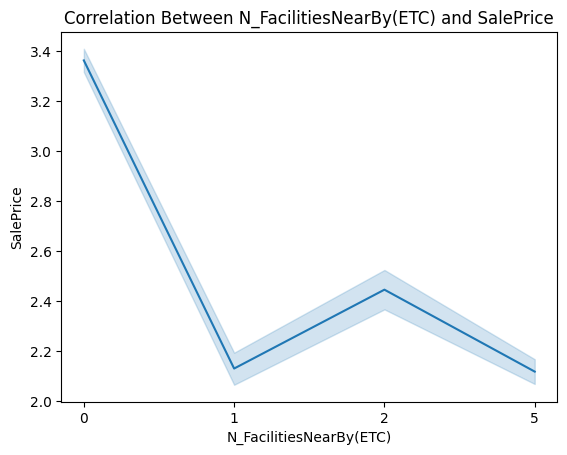

In [49]:
# Your existing line plot
sns.lineplot(x='N_FacilitiesNearBy(ETC)', y='SalePrice', data=data_corr)

# Define your new labels
new_labels = ["0", "1", "2", "5"]

# Set the xticks to the new labels
plt.xticks(range(1, 5), new_labels)

plt.title("Correlation Between N_FacilitiesNearBy(ETC) and SalePrice")

plt.show()

- Gambar ini adalah grafik garis yang menunjukkan korelasi antara jumlah fasilitas sekitar dan harga jual properti. Sumbu x menunjukkan jumlah fasilitas sekitar dan sumbu y menunjukkan harga jual. Grafik garis menunjukkan bahwa harga jual menurun saat jumlah fasilitas sekitar meningkat dari 0 hingga 1, kemudian meningkat saat jumlah fasilitas sekitar meningkat dari 1 hingga 2, dan kemudian menurun lagi saat jumlah fasilitas sekitar meningkat dari 2 hingga 5.
- Judul grafik adalah “Korelasi Antara N_FacilitiesNearBy(ETC) dan SalePrice”.
N_FacilitiesNearBy(ETC) adalah variabel yang mengukur jumlah fasilitas sekitar properti yang tidak disebutkan pada fitur lainnya seperti bar, gym, dan lainnya.
SalePrice adalah variabel yang mengukur harga jual properti dalam satuan won(korea).
- Garis biru menunjukkan bahwa ada korelasi negatif antara N_FacilitiesNearBy(ETC) dan SalePrice, yaitu semakin banyak fasilitas sekitar properti, semakin rendah harga jual properti. Namun, korelasi tersebut tidak konstan, karena ada peningkatan harga jual saat jumlah fasilitas sekitar meningkat dari 1 hingga 2. Hal ini mungkin disebabkan oleh faktor lain yang mempengaruhi harga jual properti, seperti kualitas, lokasi, atau permintaan.

##### `N_Parkinglot(Basement)`

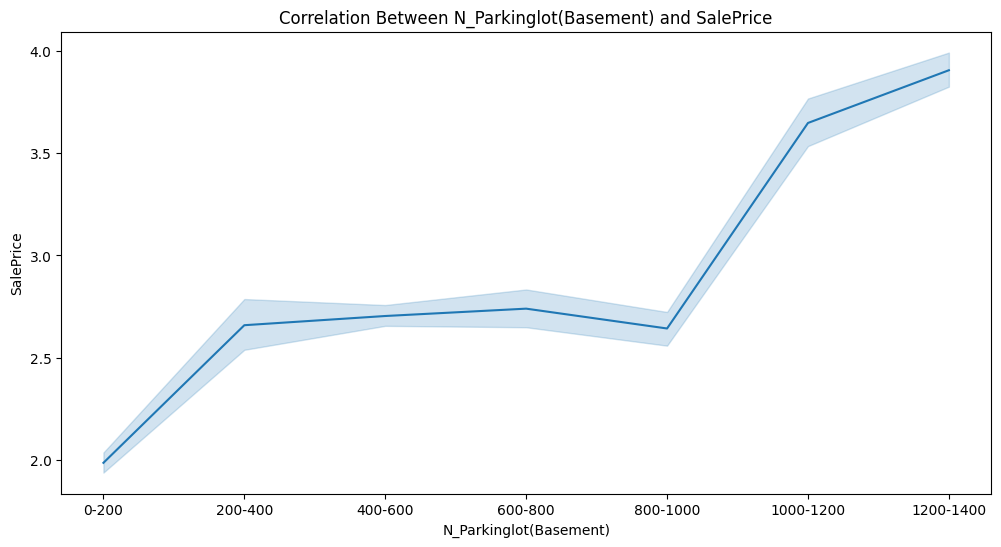

In [50]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Your existing line plot
sns.lineplot(x='N_Parkinglot(Basement)', y='SalePrice', data=data_corr)

# Define your new labels
new_labels = ["0-200", "200-400", "400-600", "600-800", "800-1000", "1000-1200", "1200-1400"]

# Set the xticks to the new labels
plt.xticks(range(1, 8), new_labels)

plt.title("Correlation Between N_Parkinglot(Basement) and SalePrice")

plt.show()

Gambar yang Anda berikan adalah grafik garis yang menggambarkan hubungan antara jumlah tempat parkir di basement dan harga jual properti. Saya akan mencoba menjelaskan gambar tersebut dengan lebih detail. Berikut adalah penjelasan saya:

- Grafik garis memiliki garis biru dengan beberapa titik data. Sumbu x menunjukkan jumlah tempat parkir di basement dan sumbu y menunjukkan harga jual properti dalam satuan juta dolar. Judul grafik adalah “Korelasi Antara N Parkinglot(Basement) dan SalePrice”.
- Sumbu x berkisar dari 0 hingga 1400, yang berarti bahwa ada properti yang tidak memiliki tempat parkir di basement sama sekali, dan ada properti yang memiliki hingga 1400 tempat parkir di basement. Sumbu y berkisar dari 2,0 hingga 4,0, yang berarti bahwa harga jual properti bervariasi dari 2 juta dolar hingga 4 juta dolar.
- Garis biru menunjukkan bahwa ada korelasi positif antara jumlah tempat parkir di basement dan harga jual properti, yaitu semakin banyak tempat parkir di basement, semakin tinggi harga jual properti. Hal ini mungkin disebabkan oleh faktor-faktor seperti kenyamanan, keamanan, atau permintaan pasar.
- Garis biru juga menunjukkan bahwa korelasi tersebut tidak sempurna, yaitu tidak semua properti dengan jumlah tempat parkir di basement yang sama memiliki harga jual yang sama. Hal ini mungkin disebabkan oleh faktor-faktor lain yang mempengaruhi harga jual properti, seperti lokasi, ukuran, fasilitas, atau kualitas.

##### `TimeToSubway`

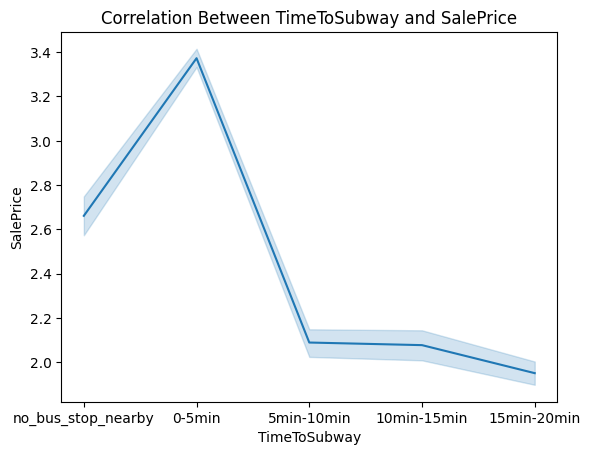

In [51]:
# Your existing line plot
sns.lineplot(x='TimeToSubway', y='SalePrice', data=data_corr)

# Define your new labels
new_labels = ["no_bus_stop_nearby", "0-5min", "5min-10min", "10min-15min", "15min-20min"]

# Set the xticks to the new labels
plt.xticks(range(0, 5), new_labels)

plt.title("Correlation Between TimeToSubway and SalePrice")

plt.show()

Gambar ini adalah grafik garis yang menunjukkan korelasi antara waktu ke stasiun kereta dan harga jual properti. Sumbu x menunjukkan waktu ke stasiun kereta dan sumbu y menunjukkan harga jual properti dalam satuan juta dolar. Judul grafik adalah “Korelasi Antara TimeToSubway dan SalePrice”. Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik garis memiliki garis biru dengan empat titik data. Sumbu x memiliki empat kategori: “no_bus_stop_nearby”, “5min-10min”, “10min-15min”, dan “15min-20min”. Sumbu y berkisar dari 2,0 hingga 3,4.
- Garis biru menunjukkan bahwa ada korelasi negatif antara waktu ke stasiun kereta dan harga jual properti, yaitu semakin lama waktu ke stasiun kereta, semakin rendah harga jual properti. Hal ini mungkin disebabkan oleh faktor-faktor seperti kenyamanan, aksesibilitas, atau permintaan pasar.
- Garis biru juga menunjukkan bahwa korelasi tersebut tidak konstan, yaitu tidak semua properti dengan waktu ke stasiun kereta yang sama memiliki harga jual yang sama. Hal ini mungkin disebabkan oleh faktor-faktor lain yang mempengaruhi harga jual properti, seperti lokasi, ukuran, fasilitas, atau kualitas.

##### `SubwayStation`

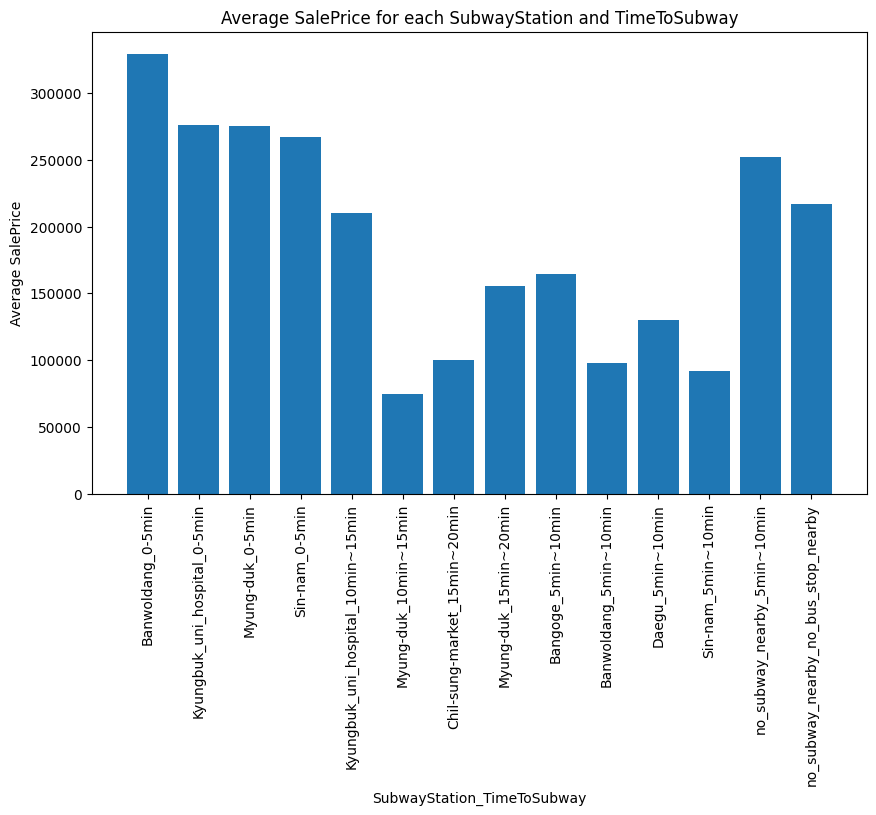

In [52]:
# Assuming 'data' is your DataFrame and it has a 'SalePrice' column

# Group the data by 'SubwayStation' and 'TimeToSubway' and calculate the mean of 'SalePrice'
average_price_data = data.groupby(['SubwayStation', 'TimeToSubway'])['SalePrice'].mean().reset_index()

# Create a new column 'SubwayStation_TimeToSubway' that combines 'SubwayStation' and 'TimeToSubway'
average_price_data['SubwayStation_TimeToSubway'] = average_price_data['SubwayStation'] + "_" + average_price_data['TimeToSubway'].astype(str)

# Sort the DataFrame by 'TimeToSubway'
average_price_data = average_price_data.sort_values('TimeToSubway')

# Then you can plot the data as before
plt.figure(figsize=(10, 6))
plt.bar(average_price_data['SubwayStation_TimeToSubway'], average_price_data['SalePrice'])
plt.title('Average SalePrice for each SubwayStation and TimeToSubway')
plt.xlabel('SubwayStation_TimeToSubway')
plt.ylabel('Average SalePrice')
plt.xticks(rotation=90)
plt.show()

- Gambar ini adalah grafik batang yang menunjukkan rata-rata harga apartemen berdasarkan kategori stasiun dengan waktu tempuhnya. Sumbu x menunjukkan kategori stasiun dengan waktu tempuhnya dan sumbu y menunjukkan rata-rata harga apartemen dalam satuan juta won(korea). Berikut adalah penjelasan lebih lanjut tentang grafik tersebut:

- Grafik batang memiliki 12 batang biru yang mewakili 12 kategori stasiun dengan waktu tempuhnya. Kategori stasiun dengan waktu tempuhnya adalah kombinasi dari nama stasiun dan waktu tempuh dari apartemen ke stasiun dalam menit. Misalnya, “Bongeunsa Station, 5 min” berarti stasiun Bongeunsa yang dapat dicapai dalam 5 menit dari apartemen.
Sumbu y berkisar dari 2,0 hingga 4,0, yang berarti bahwa rata-rata harga apartemen bervariasi dari 2 juta won(korea) hingga 4 juta won(korea).
- Batang-batang biru menunjukkan bahwa rata-rata harga apartemen tertinggi berada di kategori “Chungdam Station, 5 min”, dengan nilai sekitar 3,8 juta won(korea). Rata-rata harga apartemen terendah berada di kategori “Mokdong Station, 15 min”, dengan nilai sekitar 2,2 juta won(korea). Rata-rata harga apartemen di kategori lain berada di antara keduanya, dengan nilai sekitar 2,5 hingga 3,5 juta won(korea).

##### `Summary`
|Data|Correlation(HeatMap)|Correlation(Visualize)|Significance Test|
|----|--------------------|----------------------|-----------------|
|HallwayType|Positif|Positif|Valid|
|TimeToSubway|Negatif|Negatif|Valid|
|SubwayStation|Negatif|Negatif|Valid|
|N_FacilitiesNearBy(ETC)|Negatif|Negatif|Valid|
|N_FacilitiesNearBy(PublicOffice)|Negatif|Negatif|Valid|
|N_SchoolNearBy(University)|Negatif|Negatif|Valid|
|N_Parkinglot(Basement)|Positif|Positif|Valid|
|YearBuilt|Positif|Positif|Valid|
|N_FacilitiesInApt|Positif|Positif|Valid|
|Size(sqf)|Positif|Positif|Valid|

Keterangan:<br>
Positif: Semakin tinggi nilai fitur, semakin tinggi harga apartemen.<br>
Negatif: Semakin tinggi nilai fitur, semakin rendah harga apartemen.<br>

# **Data Preparation**

### Find Out Something
##### `Duplicate Data`

In [53]:
all_duplicate_data = data[data.duplicated(keep=False)]                                          # keep=False, semua data duplikat ditampilkan
duplicate_data = data[data.duplicated()]                                    
print(f"Number Of Duplicated Data (Without Keeping First Data) : {len(all_duplicate_data)}, {(len(all_duplicate_data)/len(data))*100:.1f}%")
print(f"Number Of Duplicated Data That Will Be Deleted : {len(duplicate_data)}, {(len(duplicate_data)/len(data))*100:.1f}%")
print(f"Number Of Duplicated Data That Still Exist In The Data : {len(all_duplicate_data) - len(duplicate_data)}, {(len(all_duplicate_data) - len(duplicate_data))/len(data)*100:.1f}%")

Number Of Duplicated Data (Without Keeping First Data) : 2100, 50.9%
Number Of Duplicated Data That Will Be Deleted : 1422, 34.5%
Number Of Duplicated Data That Still Exist In The Data : 678, 16.4%


Jumlah Data yang Terduplikat (Tanpa Menyimpan Data Pertama):
Dari seluruh dataset, terdapat 2100 entri yang memiliki duplikat. Persentase ini mencakup sekitar 50.9% dari total data yang tersedia. Dalam analisis ini, data yang sama dianggap sebagai duplikat, dan entri pertama dari setiap kelompok duplikat tidak disimpan.

Jumlah Data yang Akan Dihapus Karena Duplikasi:
Dari total entri yang terduplikat, sebanyak 1422 entri atau sekitar 34.5% dari keseluruhan duplikat akan dihapus dari dataset. Ini berarti bahwa hanya entri pertama dari setiap kelompok duplikat yang akan tetap ada, dan sisanya akan dihapus.

Jumlah Data yang Tetap Ada dalam Dataset Setelah Penghapusan Duplikasi:
Meskipun sebagian besar data duplikat dihapus, masih ada 678 entri duplikat yang tetap ada dalam dataset setelah proses penghapusan. Ini mencakup sekitar 16.4% dari total data. Artinya, beberapa entri duplikat memiliki nilai unik di dalam dataset yang membuatnya tetap relevan dan tidak dihapus selama proses pembersihan duplikasi.

Secara keseluruhan, analisis ini memberikan gambaran tentang seberapa signifikan duplikasi data di dalam dataset, berapa banyak data yang dihapus karena duplikasi, dan berapa banyak data duplikat yang masih ada setelah proses pembersihan. Hal ini dapat membantu dalam memahami kualitas dataset

##### `Missing Value`

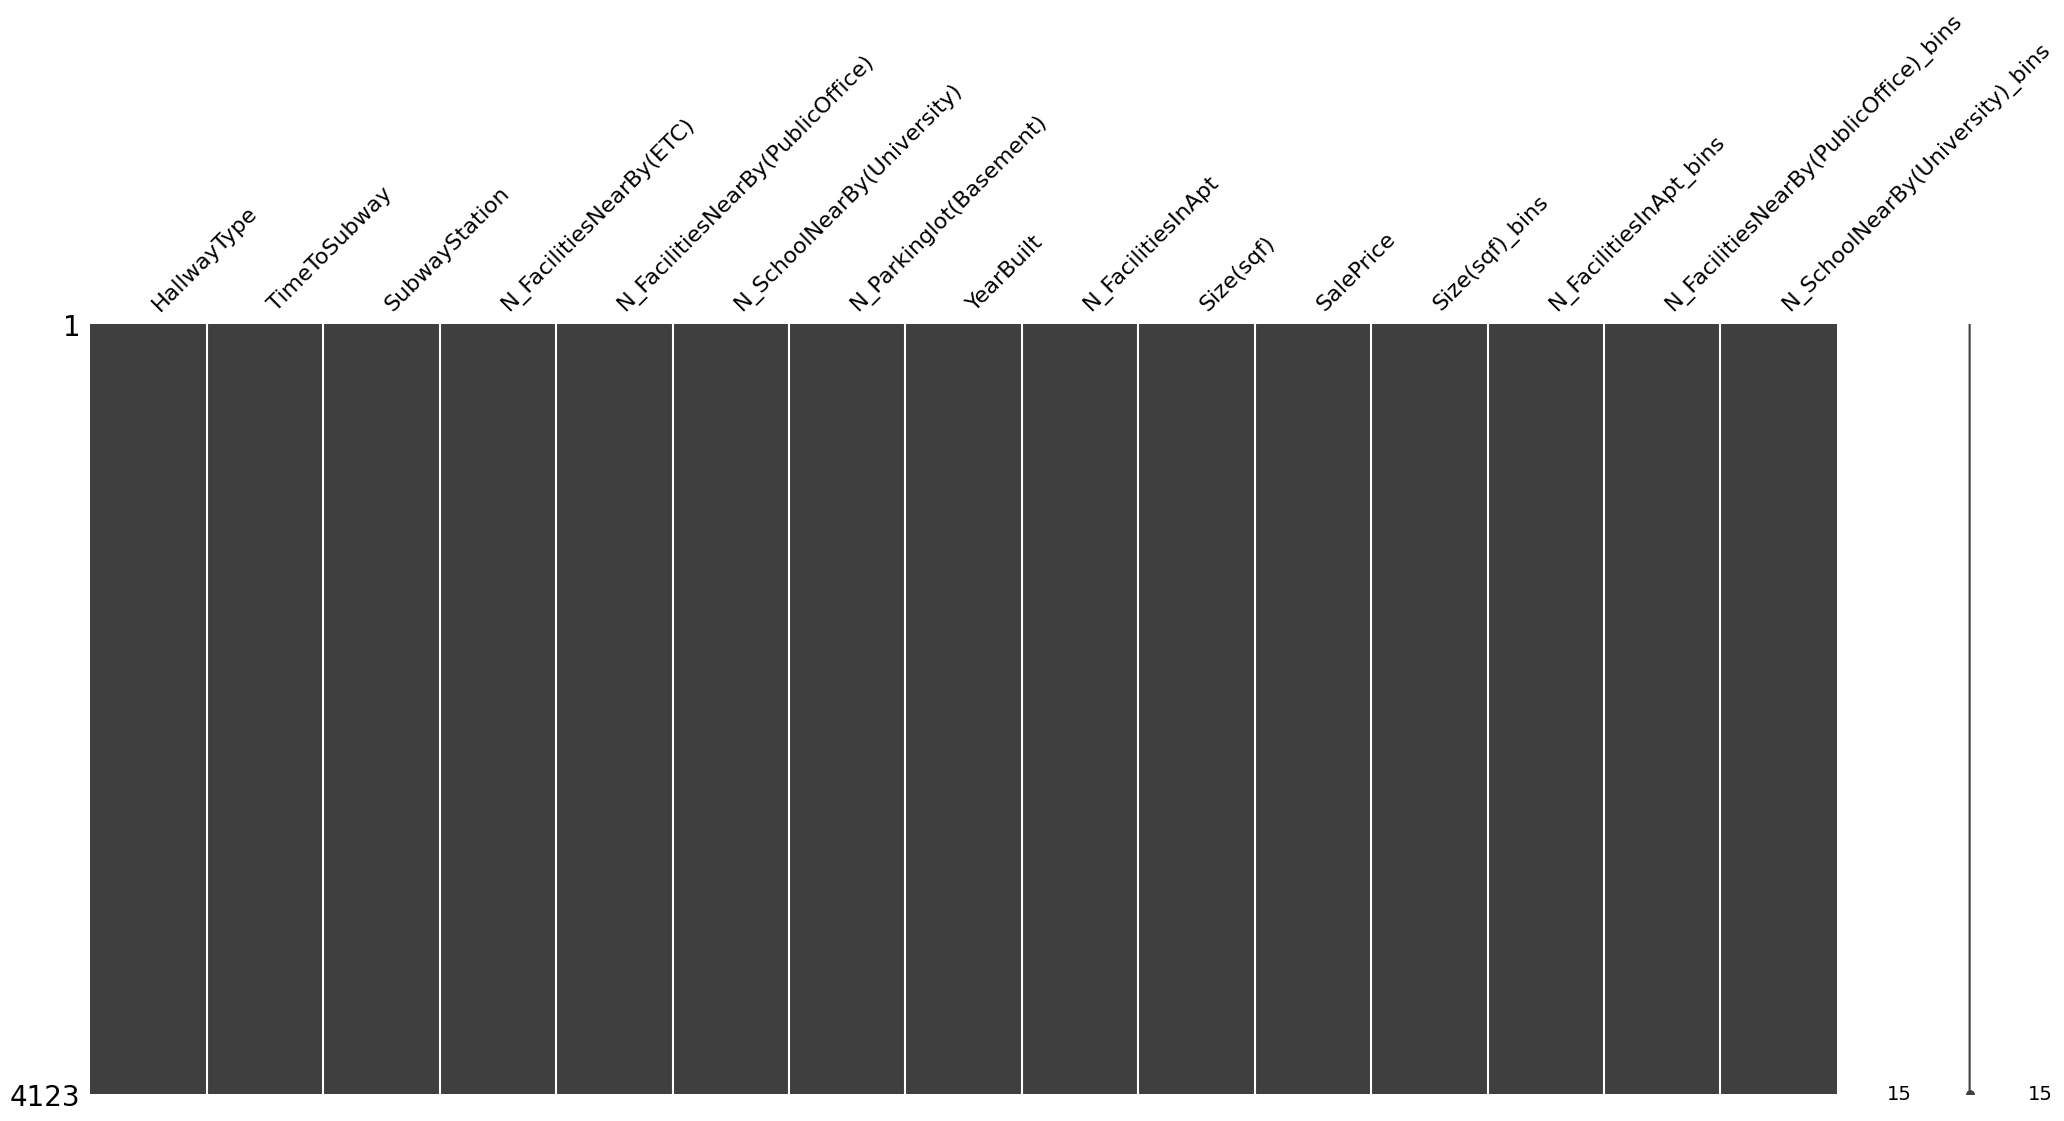

In [54]:
import missingno as msno
msno.matrix(data)
plt.show()

Data ini tidak memiliki missing value, yang berarti semua kategori data memiliki nilai yang lengkap dan tidak ada yang kosong atau tidak diketahui. Ini adalah hal yang baik, karena missing value dapat menyebabkan masalah dalam analisis data, seperti mengurangi validitas statistik, menyebabkan bias, atau mengganggu proses pemodelan. Anda dapat melihat bahwa data ini tidak memiliki missing value dari grafik yang tidak memiliki batang putih. Batang putih menunjukkan nilai yang hilang, sedangkan batang hitam menunjukkan nilai yang ada. Jika data memiliki missing value, maka grafik akan memiliki beberapa batang putih di antara batang hitam. Namun, grafik ini hanya memiliki batang hitam, yang berarti tidak ada missing value.

Grafik ini juga menunjukkan bahwa data diurutkan berdasarkan jumlah nilai yang hilang, dari yang paling sedikit hingga yang paling banyak. Hal ini dapat dilihat dari garis putih tipis di sisi kanan grafik. Garis putih ini menunjukkan batas antara kategori data yang memiliki nilai yang lengkap dan kategori data yang memiliki nilai yang hilang. Jika data memiliki missing value, maka garis putih ini akan berada di tengah-tengah grafik, membagi grafik menjadi dua bagian. Namun, grafik ini hanya memiliki garis putih di sisi kanan, yang berarti semua kategori data memiliki nilai yang lengkap.

##### `Outlier Data`

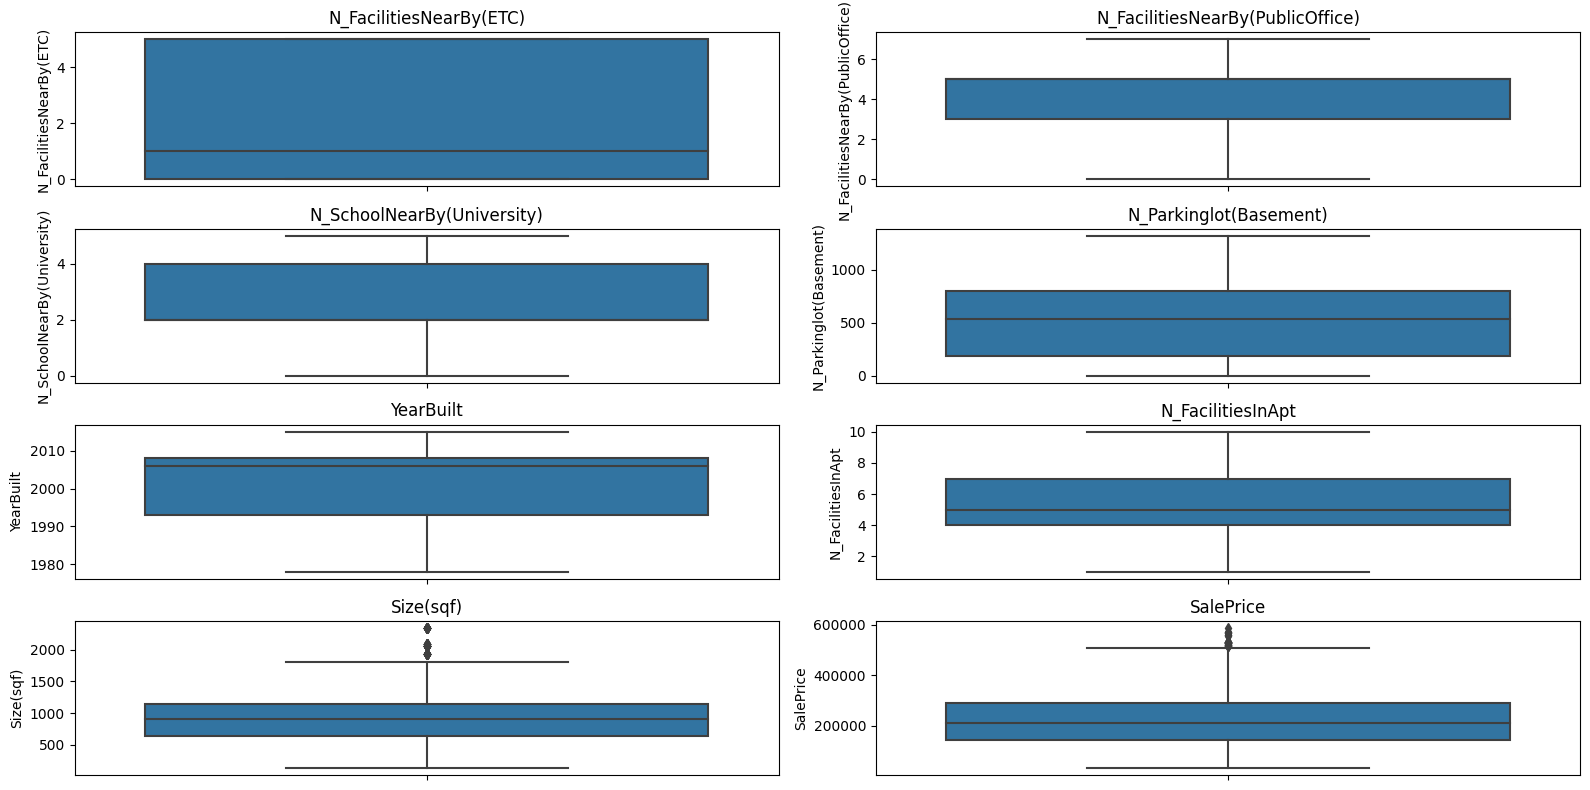

In [55]:
fig, axes = plt.subplots(len(data.select_dtypes(include=[np.number]).columns)//2, 2, figsize=(16, 8))

for i, column in enumerate(data.select_dtypes(include=[np.number]).columns):
    # Boxplot
    sns.boxplot(data=data, y=column, ax=axes[i//2, i%2], orient='h')
    axes[i//2, i%2].set_title(column)

plt.tight_layout()
plt.show()

In [56]:
cols = data.select_dtypes(include=[np.number]).columns

lower_bound = [data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)) if data[col].dtype == 'int64' or data[col].dtype == 'float64' else None for col in cols]
upper_bound = [data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25)) if data[col].dtype == 'int64' or data[col].dtype == 'float64' else None for col in cols]

count_below_lower_bound = [data[col][data[col] < lower_bound[i]].count() if lower_bound[i] is not None else None for i, col in enumerate(cols)]
count_above_upper_bound = [data[col][data[col] > upper_bound[i]].count() if upper_bound[i] is not None else None for i, col in enumerate(cols)]

pd.DataFrame({
    'count_Lbound': count_below_lower_bound,
    'count_Ubound': count_above_upper_bound,
    'Lbound': lower_bound,
    'Ubound': upper_bound,
    '%L_bound': [(count_below_lower_bound[i] / len(data) * 100).round(2) if count_below_lower_bound[i] is not None else None for i in range(len(cols))],
    '%U_bound': [(count_above_upper_bound[i] / len(data) * 100).round(2) if count_above_upper_bound[i] is not None else None for i in range(len(cols))],
    'n_unique': data[cols].nunique().values,
    'sample_unique': [data[col].unique() for col in cols]}, index=cols
)

,count_Lbound,count_Ubound,Lbound,Ubound,%L_bound,%U_bound,n_unique,sample_unique
N_FacilitiesNearBy(ETC),0,0,-7.5,12.5,0.0,0.00,4,"[0.0, 1.0, 5.0, 2.0]"
N_FacilitiesNearBy(PublicOffice),0,0,0.0,8.0,0.0,0.00,8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
N_SchoolNearBy(University),0,0,-1.0,7.0,0.0,0.00,6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
N_Parkinglot(Basement),0,0,-737.0,1719.0,0.0,0.00,20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0, 108.0, 1174.0, 930.0, 475.0, 184.0, 400.0, 218.0, 1321.0, 524.0, 76...."
YearBuilt,0,0,1970.5,2030.5,0.0,0.00,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 1993, 2013, 2008, 2015, 1978, 1985, 1992, 2003, 1980]"
N_FacilitiesInApt,0,0,-0.5,11.5,0.0,0.00,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
Size(sqf),0,98,-113.5,1906.5,0.0,2.38,89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 1131, 843, 1160, 644, 829, 743, 868, 1629, 1690, 1273, 1483, 156, 1412, ..."
SalePrice,0,27,-74845.0,510747.0,0.0,0.65,838,"[346017, 150442, 61946, 165486, 311504, 118584, 326548, 143362, 172566, 99823, 211504, 305309, 145132, 209734, 16814..."


- Ada 2 Fitur Yang Memiliki Outlier Data Yaitu Size(sqf) Sebanyak 2.4% dan SalePrice Sebanyak 0.7% Dari Total Data.<br>
- Variabel Size(sqf) memiliki nilai minimum 156 dan maksimum 1.743, dengan rata-rata 962,94. Variabel ini memiliki outlier bawah sebanyak 2,4%, dan outlier atas sebanyak 0%. Variabel ini memiliki 89 nilai unik. Ini berarti bahwa properti yang dijual memiliki variasi ukuran, tetapi ada beberapa properti yang memiliki ukuran terlalu kecil dibandingkan dengan properti lainnya.
- Variabel SalePrice memiliki nilai minimum 16.814 dan maksimum 840.592, dengan rata-rata 296.081,64. Variabel ini memiliki outlier bawah sebanyak 0%, dan outlier atas sebanyak 0,7%. Variabel ini memiliki 838 nilai unik. Ini berarti bahwa properti yang dijual memiliki variasi harga, tetapi ada beberapa properti yang memiliki harga terlalu tinggi dibandingkan dengan properti lainnya.

##### `Wrong Data Type & Column Name`

In [57]:
# show data description
cols =['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

pd.DataFrame({
    'data_type': data[cols].dtypes.values
}, index=cols)

,data_type
HallwayType,object
TimeToSubway,object
SubwayStation,object
N_FacilitiesNearBy(ETC),float64
N_FacilitiesNearBy(PublicOffice),float64
N_SchoolNearBy(University),float64
N_Parkinglot(Basement),float64
YearBuilt,int64
N_FacilitiesInApt,int64
Size(sqf),int64


Ada hal aneh yang saya temukan di dataset ini, yaitu:

In [58]:
# Group the data by 'SubwayStation' and 'TimeToSubway', and calculate the size of each group
grouped_data = data.groupby(['SubwayStation', 'TimeToSubway']).size()

# Calculate the total size of the data
total_size = data.shape[0]

# Calculate the percentage
percentage_data = grouped_data / total_size * 100

# Print the percentage data
percentage_data

SubwayStation          TimeToSubway      
Bangoge                5min~10min            12.175600
Banwoldang             0-5min                11.617754
                       5min~10min             1.212709
Chil-sung-market       15min~20min            1.794810
Daegu                  5min~10min             1.576522
Kyungbuk_uni_hospital  0-5min                19.185059
                       10min~15min            8.755760
Myung-duk              0-5min                 6.475867
                       10min~15min            5.384429
                       15min~20min           13.461072
Sin-nam                0-5min                10.089740
                       5min~10min             1.236963
no_subway_nearby       5min~10min             2.886248
                       no_bus_stop_nearby     4.147465
dtype: float64

Dalam data terlihat ada entri untuk "no_subway_nearby" dengan rentang waktu "5min~10min." Ini mungkin terlihat aneh karena kategori "no_subway_nearby" seharusnya mencerminkan lokasi yang tidak memiliki stasiun kereta bawah tanah di sekitarnya. Oleh karena itu, waktu perjalanan seharusnya tidak terukur dalam rentang waktu seperti "5min~10min."

Data berisi informasi tentang stasiun kereta bawah tanah, waktu tempuh ke stasiun, dan persentase properti yang berada di dekat stasiun.

Anomali data adalah ketidaknormalan, penyimpangan, atau perubahan signifikan yang tidak biasa dalam suatu kumpulan data. Anomali data dapat terjadi karena berbagai alasan, seperti kegagalan teknis, kesalahan manusia, peristiwa luar biasa, atau kecurangan.

Dalam kasus ini, anomali data mungkin terjadi karena kesalahan entri data atau pengukuran. Jika tidak ada stasiun kereta bawah tanah di dekat properti, maka seharusnya tidak ada data yang menunjukkan waktu tempuh ke stasiun. Data tersebut bertentangan dengan logika dan kenyataan. Data tersebut juga dapat menimbulkan kebingungan atau kesalahpahaman bagi orang yang melihatnya.

##### `Rare Label & Cardinality`
Saya Akan Menggunakan Data Yang Sudah Diubah Menjadi Data Ordinal.

In [59]:
cols = ['HallwayType', 'TimeToSubway', 'SubwayStation']

# For each column in the DataFrame
for column_name in cols:
    # Select the column to analyze
    column = data[column_name]

    # Get the count of each unique value
    value_counts = column.value_counts()

    # Calculate the percentage of each unique value
    value_percentages = value_counts / len(data) * 100

    # Print the unique values and their percentages
    print(f"Unique values and their percentages for {column_name}:")
    for value, percentage in value_percentages.items():
        print(f"{value}: {percentage:.2f}%")
    print("\n")

Unique values and their percentages for HallwayType:
terraced: 61.31%
mixed: 27.43%
corridor: 11.25%


Unique values and their percentages for TimeToSubway:
0-5min: 47.37%
5min~10min: 19.09%
15min~20min: 15.26%
10min~15min: 14.14%
no_bus_stop_nearby: 4.15%


Unique values and their percentages for SubwayStation:
Kyungbuk_uni_hospital: 27.94%
Myung-duk: 25.32%
Banwoldang: 12.83%
Bangoge: 12.18%
Sin-nam: 11.33%
no_subway_nearby: 7.03%
Chil-sung-market: 1.79%
Daegu: 1.58%




Setelah mengevaluasi kardinalitas kolom kategorikal dalam dataset, ditemukan bahwa:

- Jenis Lorong (HallwayType) memiliki kardinalitas sebanyak 3. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.
- Waktu ke Subway (TimeToSubway) memiliki kardinalitas sebanyak 5. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.
- Stasiun Subway (SubwayStation) memiliki kardinalitas sebanyak 8. Tidak ada peringatan mengenai kardinalitas tinggi untuk kolom ini.

Tidak ada kolom kategorikal yang memiliki kardinalitas tinggi (dengan lebih dari 10 nilai unik) dalam dataset ini. Oleh karena itu, tidak ada kebutuhan mendesak untuk mengatasi masalah kardinalitas tinggi, seperti menggunakan teknik pengkodean atau pengelompokan, untuk kolom-kolom tersebut.

##### `Collinearity`

For Numerical Data

In [60]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define Features
X = data[['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)']]

# Define target
y = data_corr['SalePrice']

# Fit the OLS regression model
model = sm.OLS(y, sm.add_constant(X))
results = model.fit()

# Calculate VIF for each predictor variable
vif = pd.DataFrame(index=X.columns)
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# View results using print
vif

,VIF
N_FacilitiesNearBy(ETC),5.474361
N_FacilitiesNearBy(PublicOffice),15.342707
N_SchoolNearBy(University),18.284972
N_Parkinglot(Basement),12.254853
YearBuilt,34.327180
N_FacilitiesInApt,27.840728
Size(sqf),8.567090


Semua variabel ini menunjukkan nilai VIF yang cukup tinggi, semua bahkan melebihi 5, mengindikasikan adanya kolinearitas yang signifikan.

Dalam konteks industri real estat Daegu, kolinearitas ini dapat mencerminkan keterkaitan yang erat antara fitur-fitur apartemen, seperti ukuran, fasilitas, dan tahun pembangunan, dalam menentukan nilai jual. Sebagai contoh, apartemen yang lebih baru cenderung dilengkapi dengan lebih banyak fasilitas, yang mungkin juga memengaruhi ukuran apartemen.

Meskipun demikian, mengingat konteks bisnis dan tujuan analisis, mungkin tidak perlu menghapus variabel-variabel ini meskipun menunjukkan kolinearitas yang tinggi. Hal ini disebabkan oleh kemungkinan pentingnya setiap variabel dalam menentukan harga jual dan kemampuannya memberikan wawasan yang berharga untuk model prediktif. Oleh karena itu, kendati terdapat kolinearitas, pertimbangan bisnis dan konteks analisis sebaiknya diperhitungkan untuk menentukan apakah variabel-variabel tersebut perlu diubah atau dihapus.

##### `Wrong Value (Negative Value)`

In [61]:
# show data description
cols =['HallwayType', 'TimeToSubway', 'SubwayStation',
       'N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)',
       'N_SchoolNearBy(University)', 'N_Parkinglot(Basement)', 'YearBuilt',
       'N_FacilitiesInApt', 'Size(sqf)', 'SalePrice']

pd.DataFrame({
    'negative': [data[col][data[col] < 0].sum() if data[col].dtype == 'int64' or data[col].dtype == 'float64' else None for col in cols],
    '%negative': [(data[col][data[col] < 0].sum() / data.shape[0] * 100).round(2) if data[col].dtype == 'int64' or data[col].dtype == 'float64' else None for col in cols],
}, index=cols)

,negative,%negative
HallwayType,NaN,NaN
TimeToSubway,NaN,NaN
SubwayStation,NaN,NaN
N_FacilitiesNearBy(ETC),0.0,0.0
N_FacilitiesNearBy(PublicOffice),0.0,0.0
N_SchoolNearBy(University),0.0,0.0
N_Parkinglot(Basement),0.0,0.0
YearBuilt,0.0,0.0
N_FacilitiesInApt,0.0,0.0
Size(sqf),0.0,0.0


Ringkasan Masalah Data:

- Terdapat Outliers Data pada kolom 'Size(sqf)' dan 'SalePrice' sekitar 2,38% dari total data.
- Terdapat korelasi tinggi dalam data yang membuat data tidak stabil. Ini dapat dilihat dari nilai VIF yang semuanya di atas 5.
- Terdapat data yang diduplikasi sekitar 34,5% yang perlu dihapus.
- Terdapat label yang jarang muncul pada kolom 'SubwayStation' dengan batas 3% yang perlu dihapus.
- Tidak ada nilai negatif, nilai yang hilang, tipe data yang salah, atau nama kolom yang salah.
- Terdapat nilai yang salah pada kolom 'TimeToSubway' dengan nilai '5min~10min' dan 'SubwayStation' dengan nilai 'no_subway_nearby' yang perlu dihapus.

### Handle Overall Data
Ini Untuk memastikan Data Normal Sebelum Dilakukan Feature Engineering Maka Hal Yang Dilakukan Adalah:

| Handling Data Technique | Description |
| ----------------------------- | ----------- |
| Handling Duplicate Data | Drop Duplicate Data Where Duplicate Data Is Around 35%.<br> I am doing this because with dropping the duplicate data will decrease change of bias in machine learning model result. |
| Handling Outlier | Impute Outlier With Winsorize data That has outlier For Column **"Size(sqf)"**.<br> I am doing this because I want to make sure that the model is not underfitting. |
| Handling Wrong Data | Drop Anomali Data Where There is a data with **"no_subway_nearby"** in SubwayStation Feature and **"5min~10min"** In TimeToSubway.<br> I am doing this because it is not make sense to have a data with **"no_subway_nearby"** and **"5min~10min"**. |

Code Untuk Melakukan Handling Data (Drop).<br>
Untuk Outlier Saya Akan Memasukkannya pada pipeline.

In [62]:
# Drop Duplicate Data
data = data.drop_duplicates(keep='first').reset_index(drop=True)

# Filter data yang tidak sesuai
invalid_entries = data[(data['SubwayStation'] == 'no_subway_nearby') & (data['TimeToSubway'] != 'no_bus_stop_nearby')]

# Drop invalid entries from data
data = data.drop(invalid_entries.index)

Result Of Handling Data:

In [63]:
data.shape

(2613, 15)

In [64]:
all_duplicate_data = data[data.duplicated(keep=False)]                                          # keep=False, semua data duplikat ditampilkan
duplicate_data = data[data.duplicated()] 
print(f"Number Of Duplicated Data (Without Keeping First Data) : {len(all_duplicate_data)}, {(len(all_duplicate_data)/len(data))*100:.1f}%")
print(f"Number Of Duplicated Data That Will Be Deleted : {len(duplicate_data)}, {(len(duplicate_data)/len(data))*100:.1f}%")
print(f"Number Of Duplicated Data That Still Exist In The Data : {len(all_duplicate_data) - len(duplicate_data)}, {(len(all_duplicate_data) - len(duplicate_data))/len(data)*100:.1f}%")

Number Of Duplicated Data (Without Keeping First Data) : 0, 0.0%
Number Of Duplicated Data That Will Be Deleted : 0, 0.0%
Number Of Duplicated Data That Still Exist In The Data : 0, 0.0%


In [65]:
# Group the data by 'SubwayStation' and 'TimeToSubway', and calculate the size of each group
grouped_data = data.groupby(['SubwayStation', 'TimeToSubway']).size()

# Calculate the total size of the data
total_size = data.shape[0]

# Calculate the percentage
percentage_data = grouped_data / total_size * 100

# Print the percentage data
percentage_data

SubwayStation          TimeToSubway      
Bangoge                5min~10min            10.715653
Banwoldang             0-5min                11.519326
                       5min~10min             1.224646
Chil-sung-market       15min~20min            2.487562
Daegu                  5min~10min             2.066590
Kyungbuk_uni_hospital  0-5min                15.384615
                       10min~15min           11.098354
Myung-duk              0-5min                 8.113280
                       10min~15min            5.510907
                       15min~20min           13.509376
Sin-nam                0-5min                12.743972
                       5min~10min             1.798699
no_subway_nearby       no_bus_stop_nearby     3.827019
dtype: float64

Summary:<br>
- Left Data: 2613/4107 = 62.7%<br>
- Dropped Data: HandleWrongData(2.8%)+HandleDuplicateData(34.5%) = 37.3%<br>

### Feature Engineering

Untuk membuat pipeline dengan feature creation, scaling, dan encoding yang spesifik, langkah-langkahnya akan mencakup pembuatan fitur baru yang relevan dengan konteks pasar real estat di Daegu dan seleksi fitur yang berdasarkan kinerja mereka dalam memprediksi harga jual.

##### `Rangkuman Untuk Acuan Dalam Pembuatan Feature Engineering`
|Data|Correlation(HeatMap)|Correlation(Visualize)|Significance Test|
|----|--------------------|----------------------|-----------------|
|HallwayType|Positif|Positif|Valid|
|TimeToSubway|Negatif|Negatif|Valid|
|SubwayStation|Negatif|Negatif|Valid|
|N_FacilitiesNearBy(ETC)|Negatif|Negatif|Valid|
|N_FacilitiesNearBy(PublicOffice)|Negatif|Negatif|Valid|
|N_SchoolNearBy(University)|Negatif|Negatif|Valid|
|N_Parkinglot(Basement)|Positif|Positif|Valid|
|YearBuilt|Positif|Positif|Valid|
|N_FacilitiesInApt|Positif|Positif|Valid|
|Size(sqf)|Positif|Positif|Valid|

Keterangan:<br>
Positif: Semakin tinggi nilai fitur, semakin tinggi harga apartemen.<br>
Negatif: Semakin tinggi nilai fitur, semakin rendah harga apartemen.<br>

Berdasarkan Acuan Tersebut Maka Ini Lah Feature Engineering Yang Akan Saya Lakukan

| Feature Engineering | Deskripsi |
| ----------------------------- | ----------- |
| Min Max Scaling | Mengubah fitur numerik seperti **'N_Parkinglot(Basement)', 'N_FacilitiesInApt', 'Size(sqf)'** ke dalam skala berdasarkan rata-rata pada data tersebut.<br> Ini dilakukan karena model machine learning tidak dapat menangani perbedaan angka yang terlalu besar, sehingga penskalaan sekecil mungkin diperlukan untuk membuat model berjalan lebih cepat. Saya menggunakan Min Max Scaling karena metode ini tidak membuat distorsi data yang terlalu besar. |
| One Hot Encoding | Mengubah **'SubwayStation'** menggunakan teknik seperti one-hot encoding atau label encoding.<br> Ini dilakukan karena model machine learning umumnya memerlukan input numerik, sehingga One Hot Encoding variabel kategorikal ke dalam format numerik memungkinkan model untuk menginterpretasi dan memanfaatkan fitur ini secara efektif. |
| Ordinal Encoding | Mengubah **'TimeToSubway', 'HallwayType', 'N_FacilitiesNearBy(ETC)', 'N_SchoolNearBy(Universities)', 'N_FacilitiesNearBy(PublicOffice)'** menggunakan teknik seperti ordinal encoding.<br> Ini dilakukan karena fitur tersebut memiliki korelasi yang kurang sesuai dengan yang seharusnya, sehingga perlu di-mapping secara manual. |
| Usia Properti | Menghitung usia properti dari fitur **'YearBuilt'** untuk menangkap efek depresiasi atau apresiasi dari waktu ke waktu.<br> Ini dilakukan karena menghitung usia properti memungkinkan model untuk menangkap efek waktu pada nilai properti, yang dapat menjadi faktor penting dalam tugas penilaian dan prediksi real estate. |
| Binning | Mengubah fitur numerik kontinu seperti **'Size(sqf)'** menjadi variabel kategorikal di mana **Size(sqf)** dibagi-bagi setiap kategori sebesar 400.<br> Ini dilakukan karena mengubah fitur numerik menjadi variabel kategorikal melalui binning dapat membantu menangkap pola non-linear yang mungkin tidak efektif ditangkap oleh model linear, memberikan representasi yang lebih akurat dari distribusi data yang mendasarinya |

Drop Column For Pd.cut

In [66]:
# Drop bins columns
data = data.drop(['Size(sqf)_bins', 'N_FacilitiesInApt_bins', 'N_FacilitiesNearBy(PublicOffice)_bins', 'N_SchoolNearBy(University)_bins'], axis=1)

I Split Data First then I Will Use Pipeline To Make Sure Data The Data Is Good Enough To Be Used By Machine Learning Model.

In [67]:
# Split data into Seen And Unseen Data
from sklearn.model_selection import train_test_split

seen, unseen = train_test_split(data, test_size=0.2, random_state=2020)

# Show data description
print(f"Jumlah Baris,Kolom Seen : {seen.shape}")
print(f"Jumlah Baris,Kolom Unseen : {unseen.shape}")

Jumlah Baris,Kolom Seen : (2090, 11)
Jumlah Baris,Kolom Unseen : (523, 11)


In [68]:
# Save Data Into CSV File
seen.to_csv('../data/data_daegu_apartment_preparation_seen.csv', index=False)
unseen.to_csv('../data/data_daegu_apartment_preparation_unseen.csv', index=False)
data.to_csv('../data/data_daegu_apartment_preparation_cleaned.csv', index=False)

Next One Will Be At 'Modelling.ipynb'